Evaluate all trained models

Only load pre-generated results from their folders

No new inference will be made

Research Questions (RQ)

1. Does imbalance training dataset critically hamper performance?
2. Is size of the dataset critical to the performance?
3. What’s the best model w/ little hyperparameter selection?



In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

# set style of graphs
# ref: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
plt.style.use('seaborn-v0_8-dark')
sns.set_palette('tab10')        # default matplotlib color palette, ref: https://seaborn.pydata.org/tutorial/color_palettes.html

# trigger graph save functionality

SAVE_GRAPHS = False

In [2]:
# load all eval metrics from each models folder

import pandas as pd
import numpy as np

from pathlib import Path
from itertools import product

# setup output folder for storing produced graphs for each RQ
output_folder = Path('eval_graphs')

rq1_output_folder = output_folder / 'rq01'
rq2_output_folder = output_folder / 'rq02'
rq3_output_folder = output_folder / 'rq03'

if not output_folder.exists():
    output_folder.mkdir()

if not rq1_output_folder.exists():
    rq1_output_folder.mkdir()

if not rq2_output_folder.exists():
    rq2_output_folder.mkdir()

if not rq3_output_folder.exists():
    rq3_output_folder.mkdir()

tfidf_rf_folder = Path('tfidf-rf_2023-12-16')
glove_cnn_folder = Path('glove-cnn_2023-12-12')
bert_folder = Path('bert_2023-12-13')

tfidf_rf_prefix = 'tfidf-rf-20000'
glove_cnn_prefix = 'glove-cnn-20000'
bert_prefix = 'bert-finetune'

DATASET_SIZES = [120, 240, 480]
DATASET_BALANCED_BOOL = [True, False]

load_pairs = list(product(DATASET_SIZES, DATASET_BALANCED_BOOL))

EVAL_FOLDERS_PREFIXS = ['test', 'valid_bal', 'valid_imbal']

BAL_INDEXS = [i for i in range(len(load_pairs)) if load_pairs[i][1]]
IMBAL_INDEXS = [i for i in range(len(load_pairs)) if not load_pairs[i][1]]

In [3]:
load_pairs

[(120, True),
 (120, False),
 (240, True),
 (240, False),
 (480, True),
 (480, False)]

In [4]:
BAL_INDEXS, IMBAL_INDEXS

([0, 2, 4], [1, 3, 5])

In [5]:
# load the report dataframes

tfidf_rf_reports = {}

glove_cnn_reports = {}

bert_reports = {}

# initalize the dictionaries
for eval_prefix in EVAL_FOLDERS_PREFIXS:
    tfidf_rf_reports[eval_prefix] = []
    glove_cnn_reports[eval_prefix] = []
    bert_reports[eval_prefix] = []

for folder, prefix, reports_dict in [(tfidf_rf_folder, tfidf_rf_prefix, tfidf_rf_reports), (glove_cnn_folder, glove_cnn_prefix, glove_cnn_reports), (bert_folder, bert_prefix, bert_reports)]:
    for load_pair in load_pairs:
        for eval_prefix in EVAL_FOLDERS_PREFIXS:
            # get the folder path
            model_folder = Path.joinpath(folder, f'{prefix}_{load_pair[0]}k_{"bal" if load_pair[1] else "imbal"}')

            # get the report folder path
            model_report_path = Path.joinpath(model_folder, 'eval_metrics', eval_prefix).resolve()
            print(model_report_path)

            # find the only .csv file in the folder
            model_report_path = list(model_report_path.glob('*.csv'))[0]

            # load the .csv file in dataframe, then add it to the list
            reports_dict[eval_prefix].append(pd.read_csv(model_report_path, index_col=False))

/Users/michaelcheng/Documents/MyDocs/HKU/COMP4801 FYP/FYP/NLP/dev-workspace/sa/tfidf-rf_2023-12-16/tfidf-rf-20000_120k_bal/eval_metrics/test
/Users/michaelcheng/Documents/MyDocs/HKU/COMP4801 FYP/FYP/NLP/dev-workspace/sa/tfidf-rf_2023-12-16/tfidf-rf-20000_120k_bal/eval_metrics/valid_bal
/Users/michaelcheng/Documents/MyDocs/HKU/COMP4801 FYP/FYP/NLP/dev-workspace/sa/tfidf-rf_2023-12-16/tfidf-rf-20000_120k_bal/eval_metrics/valid_imbal
/Users/michaelcheng/Documents/MyDocs/HKU/COMP4801 FYP/FYP/NLP/dev-workspace/sa/tfidf-rf_2023-12-16/tfidf-rf-20000_120k_imbal/eval_metrics/test
/Users/michaelcheng/Documents/MyDocs/HKU/COMP4801 FYP/FYP/NLP/dev-workspace/sa/tfidf-rf_2023-12-16/tfidf-rf-20000_120k_imbal/eval_metrics/valid_bal
/Users/michaelcheng/Documents/MyDocs/HKU/COMP4801 FYP/FYP/NLP/dev-workspace/sa/tfidf-rf_2023-12-16/tfidf-rf-20000_120k_imbal/eval_metrics/valid_imbal
/Users/michaelcheng/Documents/MyDocs/HKU/COMP4801 FYP/FYP/NLP/dev-workspace/sa/tfidf-rf_2023-12-16/tfidf-rf-20000_240k_bal/e

In [6]:
tfidf_rf_reports.keys()

dict_keys(['test', 'valid_bal', 'valid_imbal'])

In [7]:
glove_cnn_reports.keys()

dict_keys(['test', 'valid_bal', 'valid_imbal'])

## RQ1: imbalance vs balance

for each type of model, generate table to compare metrics on imbalance and balance

one table for imbalanced training set

one table for balanced training set

fixed on training set sized 120K (smallest -> most obvious)

In [8]:
# 120K imbalanced training set
# validation result on valid_bal

list_120k_imb_all_validbal = []

for reports_dict in [tfidf_rf_reports, glove_cnn_reports, bert_reports]:
    list_120k_imb_all_validbal.append(reports_dict['valid_bal'][1])

df_120k_imb_all_validbal = pd.concat(list_120k_imb_all_validbal, axis=0).drop(columns=['Unnamed: 0']).reset_index(drop=True)
# df_120k_imb_all_validbal

# filter dfs to show precision, recall and f1-score across all classes
# imbal training set

df_120k_imb_all_validbal = df_120k_imb_all_validbal[[col for col in list(df_120k_imb_all_validbal.columns) for metric in ['precision', 'recall', 'f1-score', 'roc_auc', 'model'] if metric in col]]
df_120k_imb_all_validbal.drop(columns=['macro avg-precision', 'macro avg-recall', 'macro avg-f1-score'], inplace=True)
df_120k_imb_all_validbal

,model,0-precision,0-recall,0-f1-score,1-precision,1-recall,1-f1-score,weighted avg-precision,weighted avg-recall,weighted avg-f1-score,roc_auc
0,tfidf-rf-20000_120k_imbal,0.953804,0.255701,0.403287,0.570245,0.987615,0.723021,0.762024,0.621658,0.563154,0.867345
1,glove-cnn-20000_120k_imbal,0.952147,0.636389,0.762886,0.726942,0.968017,0.830336,0.839545,0.802203,0.796611,0.798032
2,bert-finetune_120k_imbal,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.899224


In [9]:
# 120K balanced training set
# validation result on valid_bal

list_120k_bal_all_validbal = []

for reports_dict in [tfidf_rf_reports, glove_cnn_reports, bert_reports]:
    list_120k_bal_all_validbal.append(reports_dict['valid_bal'][0])

df_120k_bal_all_validbal = pd.concat(list_120k_bal_all_validbal, axis=0).drop(columns=['Unnamed: 0']).reset_index(drop=True)
# df_120k_bal_all_validbal

# filter dfs to show precision, recall and f1-score across all classes
# bal training set

df_120k_bal_all_validbal = df_120k_bal_all_validbal[[col for col in list(df_120k_bal_all_validbal.columns) for metric in ['precision', 'recall', 'f1-score', 'roc_auc', 'model'] if metric in col]]
df_120k_bal_all_validbal.drop(columns=['macro avg-precision', 'macro avg-recall', 'macro avg-f1-score'], inplace=True)
df_120k_bal_all_validbal

,model,0-precision,0-recall,0-f1-score,1-precision,1-recall,1-f1-score,weighted avg-precision,weighted avg-recall,weighted avg-f1-score,roc_auc
0,tfidf-rf-20000_120k_bal,0.795915,0.839997,0.817362,0.830615,0.784612,0.806958,0.813265,0.812304,0.812160,0.508543
1,glove-cnn-20000_120k_bal,0.843525,0.916282,0.878399,0.908379,0.830028,0.867438,0.875952,0.873155,0.872919,0.405362
2,bert-finetune_120k_bal,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.589608


In [10]:
# concat the two dfs (first 3 is bal, last 3 is imbal)
df_120k_all_validbal = pd.concat([df_120k_bal_all_validbal, df_120k_imb_all_validbal], axis=0).reset_index(drop=True)
# create a column to identify the training set type
df_120k_all_validbal['training_set'] = ['bal'] * 3 + ['imbal'] * 3
# rename the model's name in model column by dropping bal/imbal and dataset size
df_120k_all_validbal['model'] = df_120k_all_validbal['model'].apply(lambda x: x.split('_')[0])

df_120k_all_validbal


,model,0-precision,0-recall,0-f1-score,1-precision,1-recall,1-f1-score,weighted avg-precision,weighted avg-recall,weighted avg-f1-score,roc_auc,training_set
0,tfidf-rf-20000,0.795915,0.839997,0.817362,0.830615,0.784612,0.806958,0.813265,0.812304,0.812160,0.508543,bal
1,glove-cnn-20000,0.843525,0.916282,0.878399,0.908379,0.830028,0.867438,0.875952,0.873155,0.872919,0.405362,bal
2,bert-finetune,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.589608,bal
3,tfidf-rf-20000,0.953804,0.255701,0.403287,0.570245,0.987615,0.723021,0.762024,0.621658,0.563154,0.867345,imbal
4,glove-cnn-20000,0.952147,0.636389,0.762886,0.726942,0.968017,0.830336,0.839545,0.802203,0.796611,0.798032,imbal
5,bert-finetune,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.899224,imbal


/var/folders/hm/n8540hpn7xd1f0pw3_qnsp4r0000gn/T/ipykernel_51994/3846541507.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set(xticklabels=['TFIDF-RF', 'GloVe-CNN', 'BERT'])


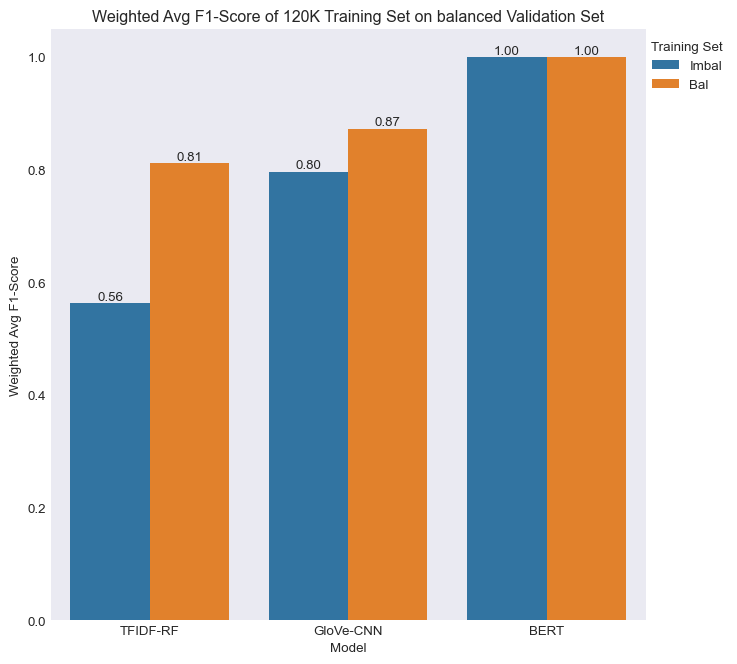

In [11]:
# write a function to generate each plot

def create_rq01_barplot(df, 
                        x='model', y='weighted avg-f1-score', x_label='Model', y_label='Weighted Avg F1-Score',
                        title='Weighted Avg F1-Score of 120K Training Set on balanced Validation Set',
                        show_bar_label=True, legend_loc='upper right', bbox_to_anchor=(1.15, 1),
                        save_graphs=SAVE_GRAPHS, output_folder=rq1_output_folder, save_filename='120k_all_validbal_weighted_avg_f1_score.png'):
    '''Create bar plot for RQ01
    Default is a barplot of weighted avg f1-score of 120K training set on balanced validation set'''

    if save_graphs and not output_folder.exists():
        return 'Output folder does not exist'

    # set the figure size
    plt.figure(dpi=96, figsize=(8, 8))

    # create the plot
    ax = sns.barplot(df, x=x, y=y, 
                     hue='training_set', hue_order=['imbal', 'bal'])

    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set(xticklabels=['TFIDF-RF', 'GloVe-CNN', 'BERT'])
    h, l = ax.get_legend_handles_labels()
    ax.legend(h, ['Imbal', 'Bal'], title='Training Set', loc=legend_loc, bbox_to_anchor=bbox_to_anchor)

    if show_bar_label:
        ax.bar_label(ax.containers[0], fmt='%.2f', label_type='edge')
        ax.bar_label(ax.containers[1], fmt='%.2f', label_type='edge')

    # save the plot before showing it
    # as after plt.show() is called, a new figure is created (clear previous figure)
    if save_graphs:
        ax.get_figure().savefig(Path.joinpath(output_folder, save_filename), bbox_inches='tight', dpi=600, facecolor='w')
        # plt.savefig(Path.joinpath(output_folder, save_filename), bbox_inches='tight', dpi=600, facecolor='w')

    # show the plot
    plt.show()

# create the plot (as a sample)
create_rq01_barplot(df_120k_all_validbal, save_graphs=False)

/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Figure size 768x768 with 0 Axes>

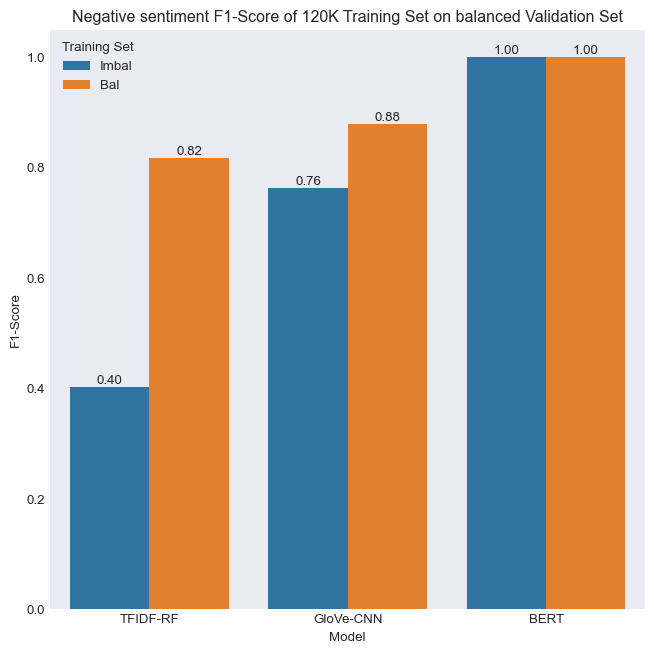

/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


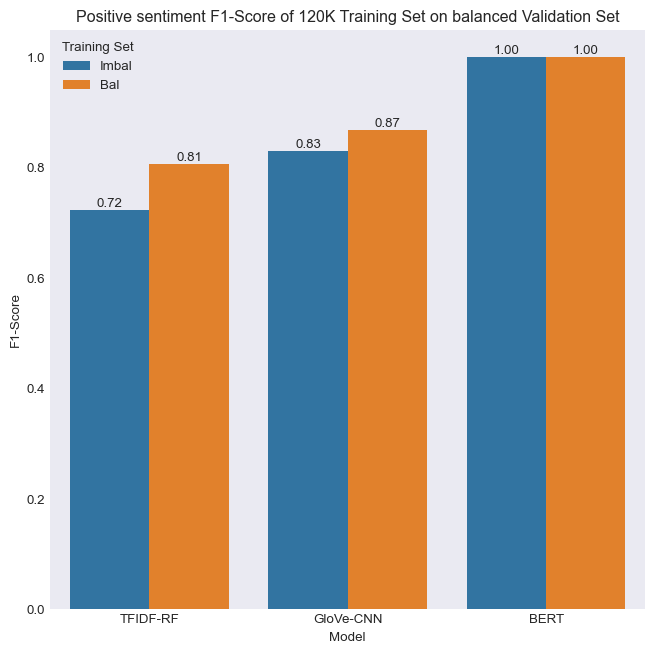

/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


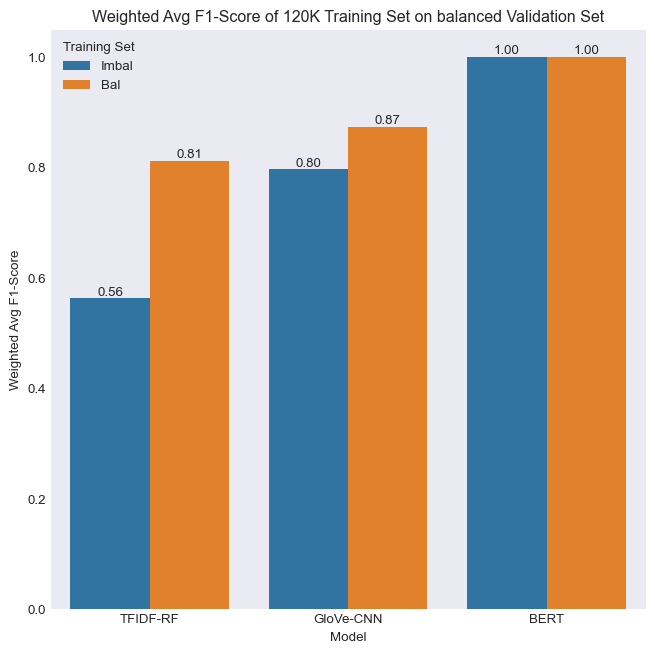

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(dpi=96, figsize=(8,8))

# create a bar chart to compare weighted avg-f1-score, on negative, possitive and weighted avg 
# across all models using seaborn
# on 120K training set
  
# call the predefined function to create the plot
create_rq01_barplot(df_120k_all_validbal, 
                    y='0-f1-score', 
                    y_label='F1-Score',
                    title='Negative sentiment F1-Score of 120K Training Set on balanced Validation Set',
                    legend_loc='best',
                    bbox_to_anchor=None,
                    save_filename='120k_all_validbal_0_f1_score.png')

create_rq01_barplot(df_120k_all_validbal,
                    y='1-f1-score', 
                    y_label='F1-Score',
                    title='Positive sentiment F1-Score of 120K Training Set on balanced Validation Set',
                    legend_loc='best',
                    bbox_to_anchor=None,
                    save_filename='120k_all_validbal_1_f1_score.png')

create_rq01_barplot(df_120k_all_validbal,
                    y='weighted avg-f1-score', 
                    y_label='Weighted Avg F1-Score',
                    title='Weighted Avg F1-Score of 120K Training Set on balanced Validation Set',
                    legend_loc='best',
                    bbox_to_anchor=None,
                    save_filename='120k_all_validbal_weighted_avg_f1_score.png')

/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Figure size 768x768 with 0 Axes>

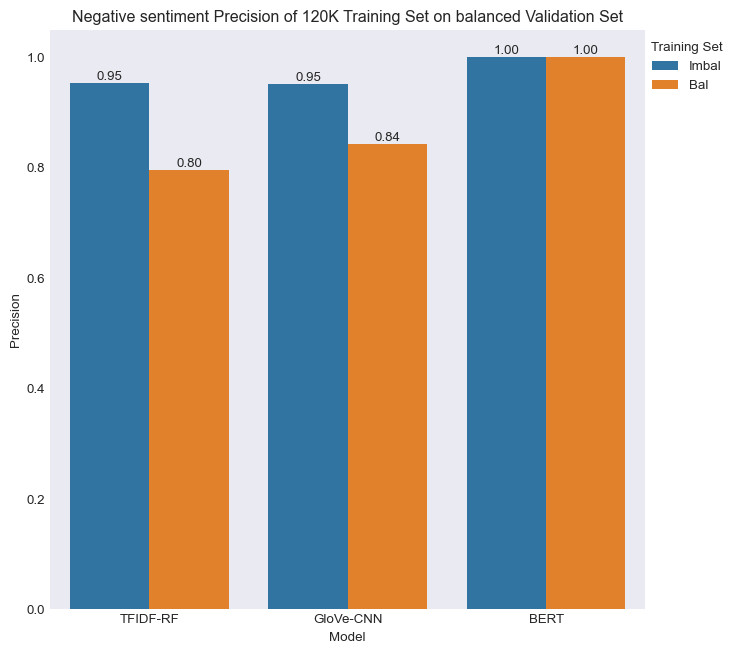

/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


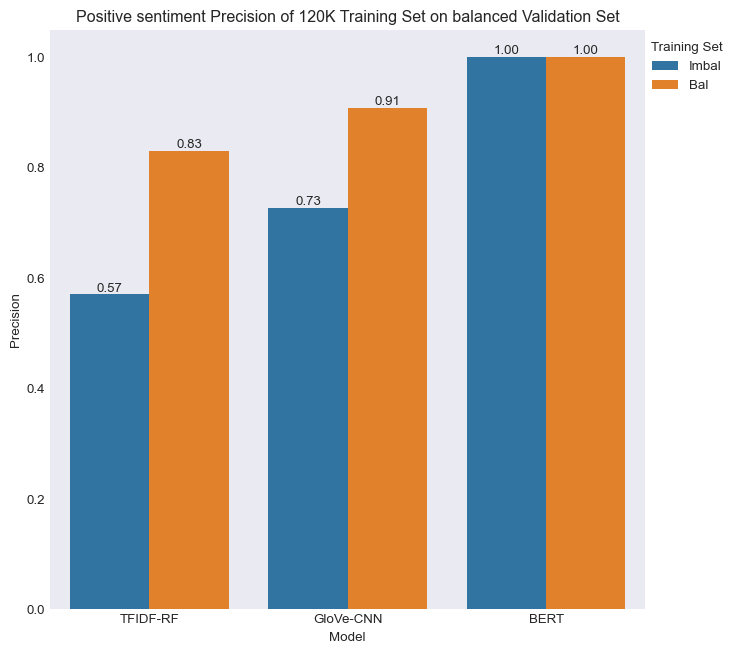

/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


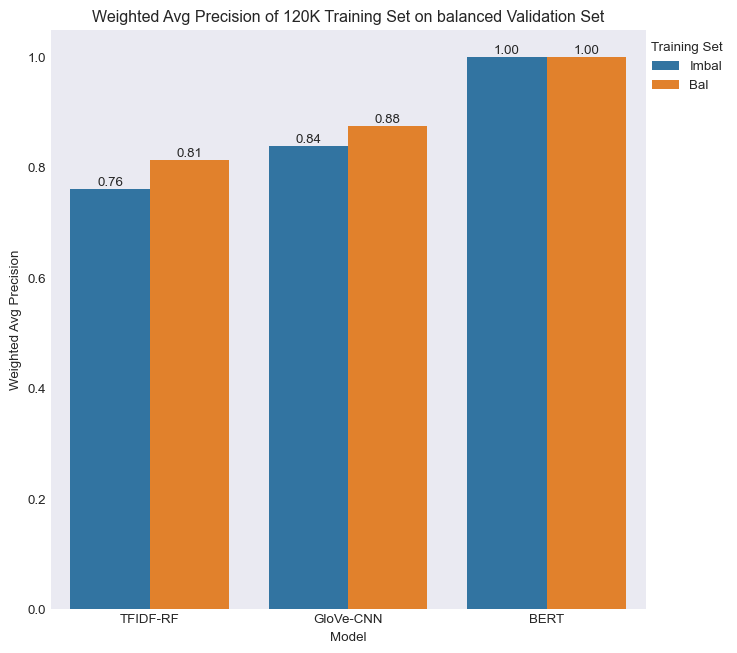

In [13]:
# generate three graphs about precision on negative, positive, and weighted average

plt.figure(dpi=96, figsize=(8,8))
# f, axs = plt.subplots(1, 3, figsize=(12, 4), dpi=96)

# call predefined function to create the plot
create_rq01_barplot(df_120k_all_validbal,
                    y='0-precision', 
                    y_label='Precision',
                    title='Negative sentiment Precision of 120K Training Set on balanced Validation Set',
                    save_filename='120k_all_validbal_0_precision.png')

create_rq01_barplot(df_120k_all_validbal,
                    y='1-precision', 
                    y_label='Precision',
                    title='Positive sentiment Precision of 120K Training Set on balanced Validation Set',
                    save_filename='120k_all_validbal_1_precision.png')

create_rq01_barplot(df_120k_all_validbal,
                    y='weighted avg-precision', 
                    y_label='Weighted Avg Precision',
                    title='Weighted Avg Precision of 120K Training Set on balanced Validation Set',
                    save_filename='120k_all_validbal_weighted_avg_precision.png')

plt.show()


/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Figure size 768x768 with 0 Axes>

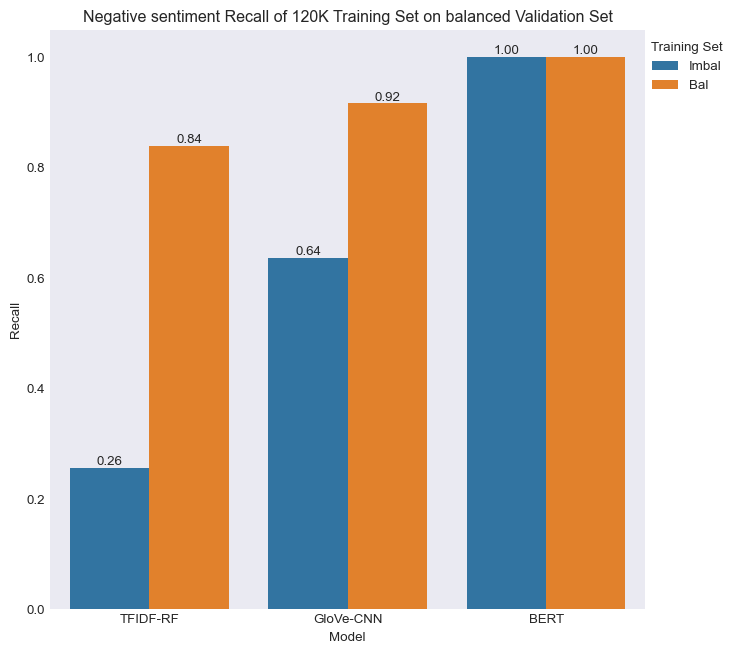

/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


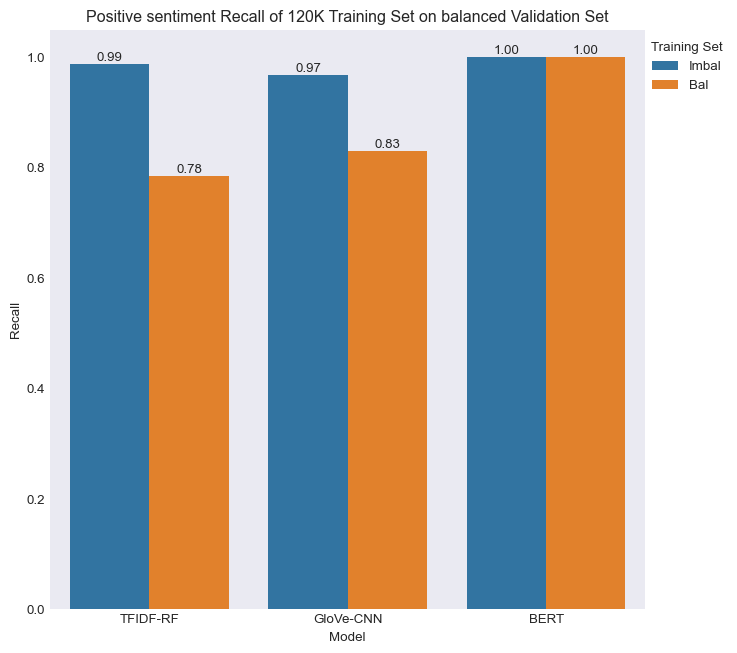

/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


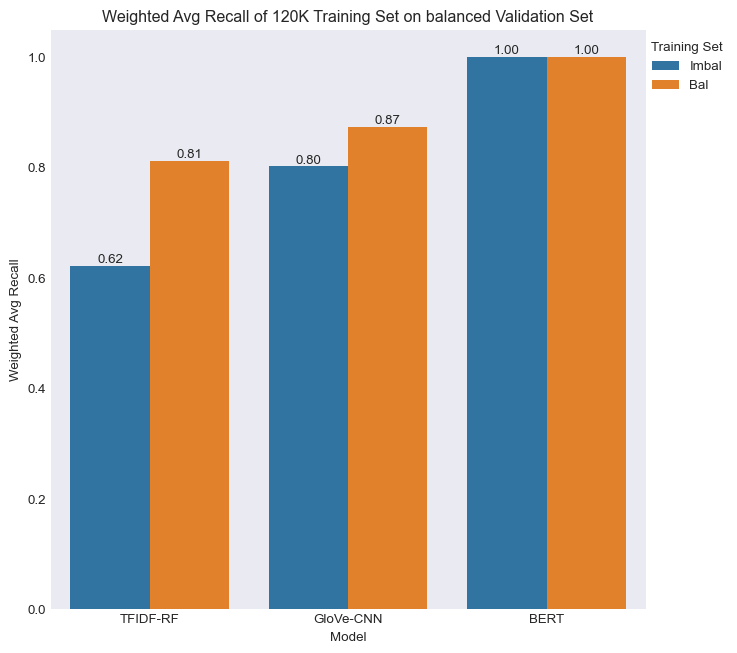

In [14]:
# generate three graphs about recall on negative, positive, and weighted average

plt.figure(dpi=96, figsize=(8,8))

# call predefined function to create the plot
create_rq01_barplot(df_120k_all_validbal,
                    y='0-recall', 
                    y_label='Recall',
                    title='Negative sentiment Recall of 120K Training Set on balanced Validation Set',
                    save_filename='120k_all_validbal_0_recall.png')

create_rq01_barplot(df_120k_all_validbal,
                    y='1-recall', 
                    y_label='Recall',
                    title='Positive sentiment Recall of 120K Training Set on balanced Validation Set',
                    save_filename='120k_all_validbal_1_recall.png')

create_rq01_barplot(df_120k_all_validbal,
                    y='weighted avg-recall', 
                    y_label='Weighted Avg Recall',
                    title='Weighted Avg Recall of 120K Training Set on balanced Validation Set',
                    save_filename='120k_all_validbal_weighted_avg_recall.png')


/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Figure size 768x768 with 0 Axes>

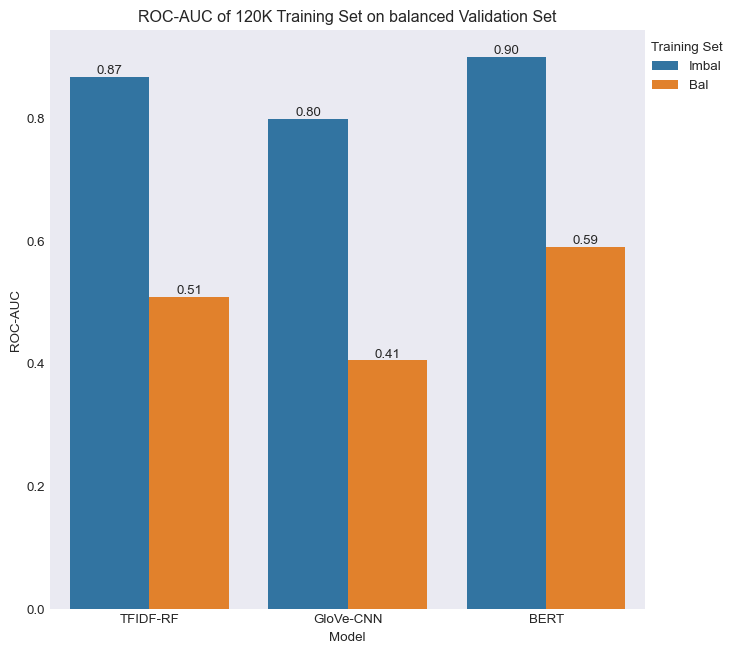

In [15]:
# generate graphs about roc-auc weighted average

plt.figure(dpi=96, figsize=(8,8))

# call predefined function to create the plot
create_rq01_barplot(df_120k_all_validbal,
                    y='roc_auc', 
                    y_label='ROC-AUC',
                    title='ROC-AUC of 120K Training Set on balanced Validation Set',
                    save_filename='120k_all_validbal_roc_auc.png')
plt.show()


Conclusion: 

while imbalanced models typically get higher numbers in precision of negative sentiment, it falls short in recall negative sentiment samples -> lower f1 score

imbalanced models typically get lower numbers in recall, yet much higher precision of positive sentiment -> yet still higher f1 score in positive sentiment

balanced models typically outscored imbalanced models in avg precision, recall and f1 score -> better model

ROC-AUC: typically gives higher proba output in imbalanced model, as majority of dataset is positive comments.

BERT: we provide way more number of comments than the recommended fine-tune numbers (recommended: 10K). Although both models trained with imbalanced and balanced data are nearily perfect (all 1.0, 0.9 ROC-AUC score), the experience on other two models suggested that model trained with balanced dataset will be perferred over that trained with imbalanced dataset.

&nbsp;

&nbsp;

&nbsp;

&nbsp;

---(This is separation space)---

&nbsp;

&nbsp;

&nbsp;

&nbsp;

Remarks: does our conclusion in RQ1 holds on other size?

Ans: Yes

In [16]:
# 240K imbalanced training set
# validation result on valid_bal

list_240k_imb_all_validbal = []

for reports_dict in [tfidf_rf_reports, glove_cnn_reports, bert_reports]:
    list_240k_imb_all_validbal.append(reports_dict['valid_bal'][3])

df_240k_imb_all_validbal = pd.concat(list_240k_imb_all_validbal, axis=0).drop(columns=['Unnamed: 0']).reset_index(drop=True)
# df_240k_imb_all_validbal

# filter dfs to show precision, recall and f1-score across all classes
# imbal training set

df_240k_imb_all_validbal = df_240k_imb_all_validbal[[col for col in list(df_240k_imb_all_validbal.columns) for metric in ['precision', 'recall', 'f1-score', 'roc_auc', 'model'] if metric in col]]
df_240k_imb_all_validbal.drop(columns=['macro avg-precision', 'macro avg-recall', 'macro avg-f1-score'], inplace=True)
df_240k_imb_all_validbal

,model,0-precision,0-recall,0-f1-score,1-precision,1-recall,1-f1-score,weighted avg-precision,weighted avg-recall,weighted avg-f1-score,roc_auc
0,tfidf-rf-20000_240k_imbal,0.955521,0.278884,0.431754,0.577834,0.987018,0.728929,0.766678,0.632951,0.580341,0.872153
1,glove-cnn-20000_240k_imbal,0.968508,0.554376,0.705133,0.687851,0.981974,0.809009,0.828180,0.768175,0.757071,0.866560
2,bert-finetune_240k_imbal,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.904239


In [17]:
# 240K imbalanced training set
# validation result on valid_bal

list_240k_bal_all_validbal = []

for reports_dict in [tfidf_rf_reports, glove_cnn_reports, bert_reports]:
    list_240k_bal_all_validbal.append(reports_dict['valid_bal'][2])

df_240k_bal_all_validbal = pd.concat(list_240k_bal_all_validbal, axis=0).drop(columns=['Unnamed: 0']).reset_index(drop=True)
# df_240k_bal_all_validbal

# filter dfs to show precision, recall and f1-score across all classes
# bal training set

df_240k_bal_all_validbal = df_240k_bal_all_validbal[[col for col in list(df_240k_bal_all_validbal.columns) for metric in ['precision', 'recall', 'f1-score', 'roc_auc', 'model'] if metric in col]]
df_240k_bal_all_validbal.drop(columns=['macro avg-precision', 'macro avg-recall', 'macro avg-f1-score'], inplace=True)
df_240k_bal_all_validbal

,model,0-precision,0-recall,0-f1-score,1-precision,1-recall,1-f1-score,weighted avg-precision,weighted avg-recall,weighted avg-f1-score,roc_auc
0,tfidf-rf-20000_240k_bal,0.803702,0.844530,0.823611,0.836209,0.793731,0.814417,0.819956,0.819130,0.819014,0.511319
1,glove-cnn-20000_240k_bal,0.901160,0.866458,0.883468,0.871410,0.904966,0.887871,0.886285,0.885712,0.885670,0.546894
2,bert-finetune_240k_bal,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.680260


In [18]:
# concat the two dfs (first 3 is bal, last 3 is imbal)
df_240k_all_validbal = pd.concat([df_240k_bal_all_validbal, df_240k_imb_all_validbal], axis=0).reset_index(drop=True)
# create a column to identify the training set type
df_240k_all_validbal['training_set'] = ['bal'] * 3 + ['imbal'] * 3
# rename the model's name in model column by dropping bal/imbal and dataset size
df_240k_all_validbal['model'] = df_240k_all_validbal['model'].apply(lambda x: x.split('_')[0])

df_240k_all_validbal

,model,0-precision,0-recall,0-f1-score,1-precision,1-recall,1-f1-score,weighted avg-precision,weighted avg-recall,weighted avg-f1-score,roc_auc,training_set
0,tfidf-rf-20000,0.803702,0.844530,0.823611,0.836209,0.793731,0.814417,0.819956,0.819130,0.819014,0.511319,bal
1,glove-cnn-20000,0.901160,0.866458,0.883468,0.871410,0.904966,0.887871,0.886285,0.885712,0.885670,0.546894,bal
2,bert-finetune,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.680260,bal
3,tfidf-rf-20000,0.955521,0.278884,0.431754,0.577834,0.987018,0.728929,0.766678,0.632951,0.580341,0.872153,imbal
4,glove-cnn-20000,0.968508,0.554376,0.705133,0.687851,0.981974,0.809009,0.828180,0.768175,0.757071,0.866560,imbal
5,bert-finetune,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.904239,imbal


/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Figure size 768x768 with 0 Axes>

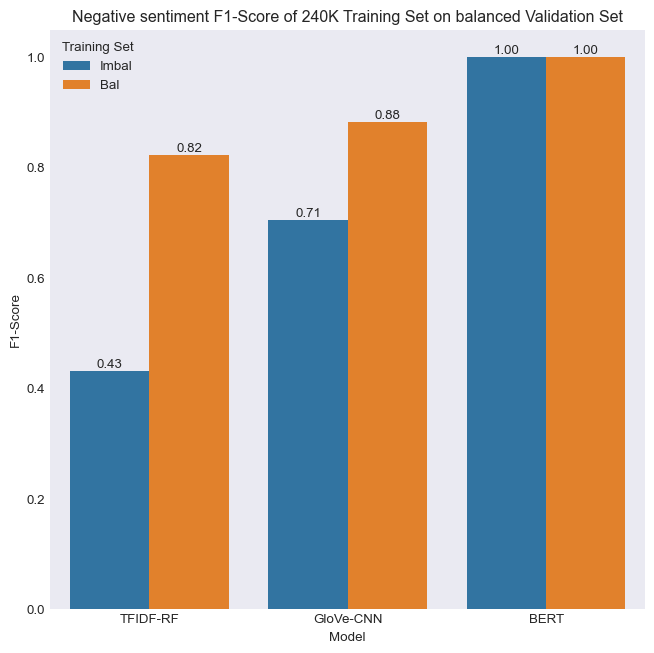

/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


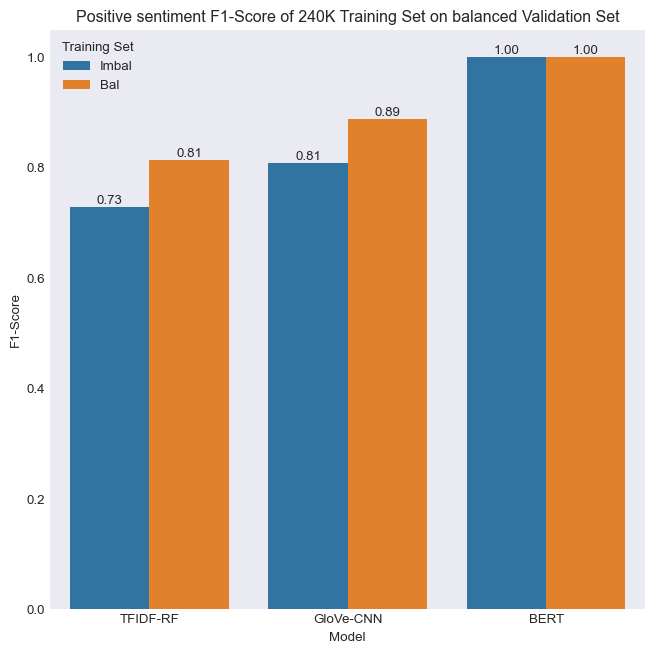

/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


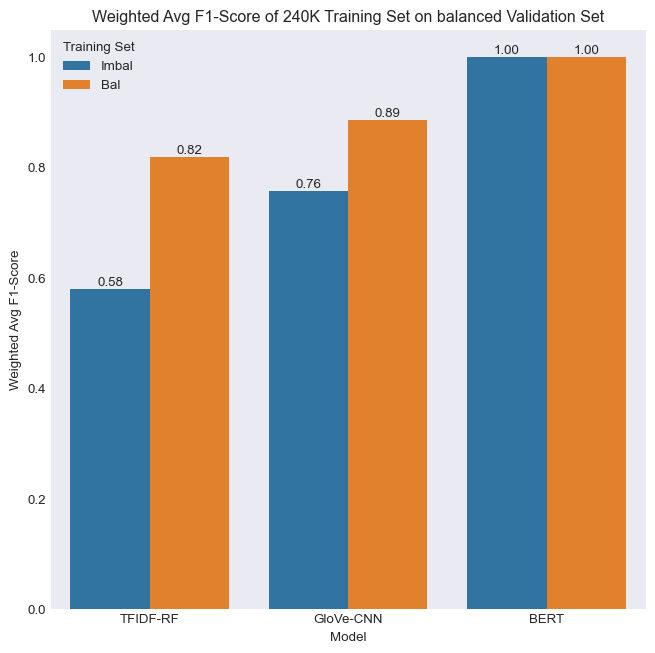

/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Figure size 768x768 with 0 Axes>

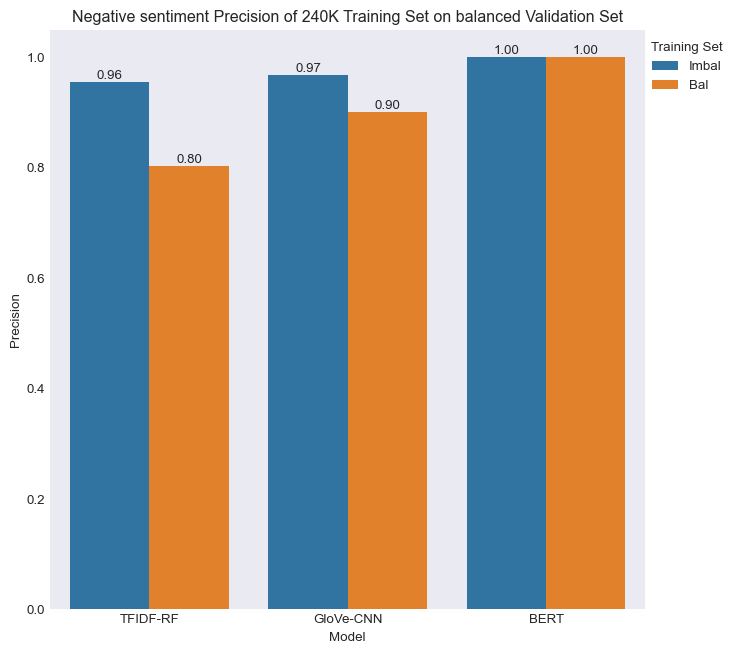

/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


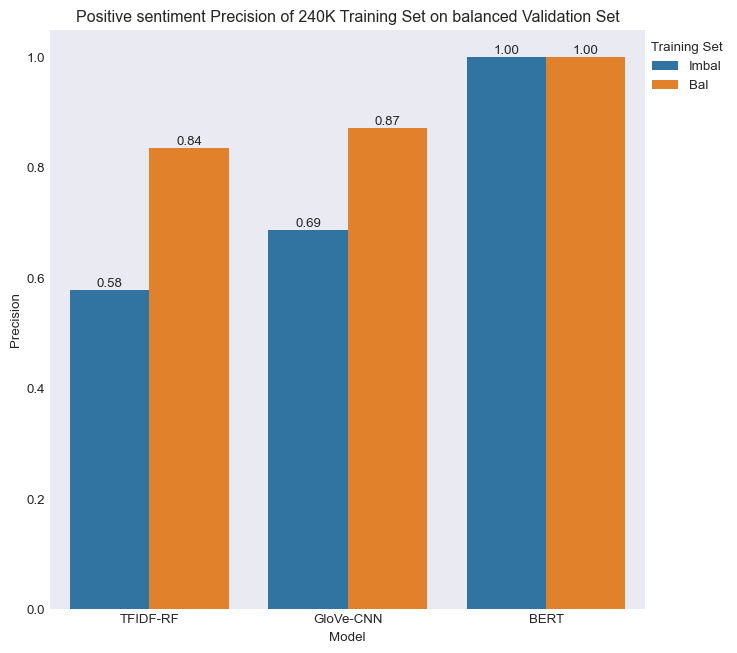

/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


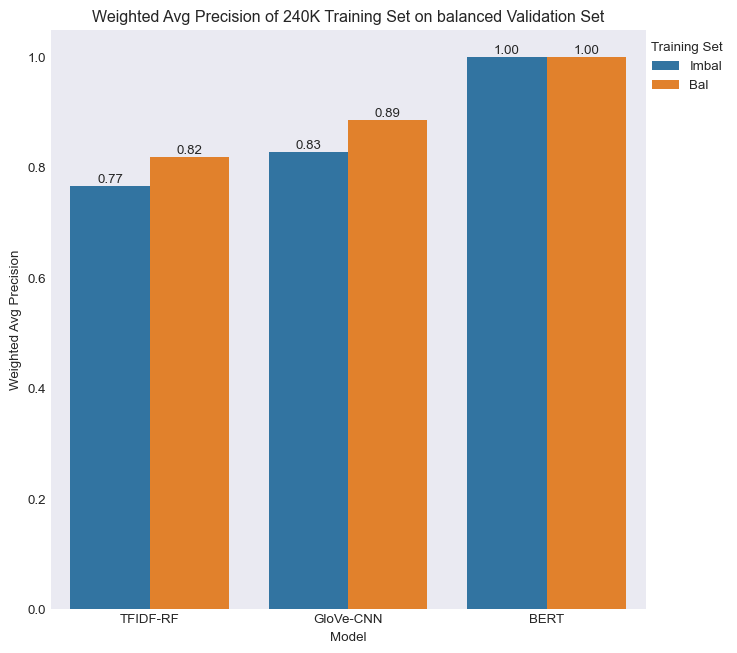

/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Figure size 768x768 with 0 Axes>

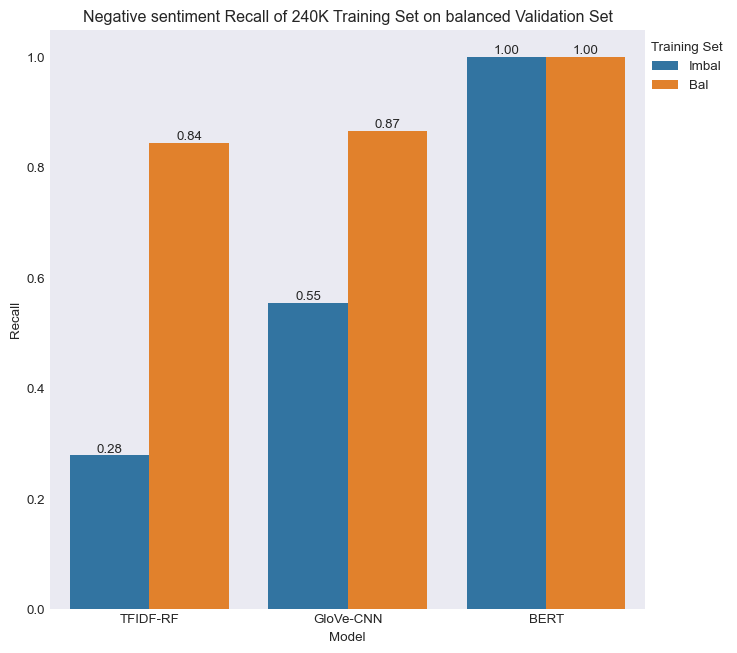

/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


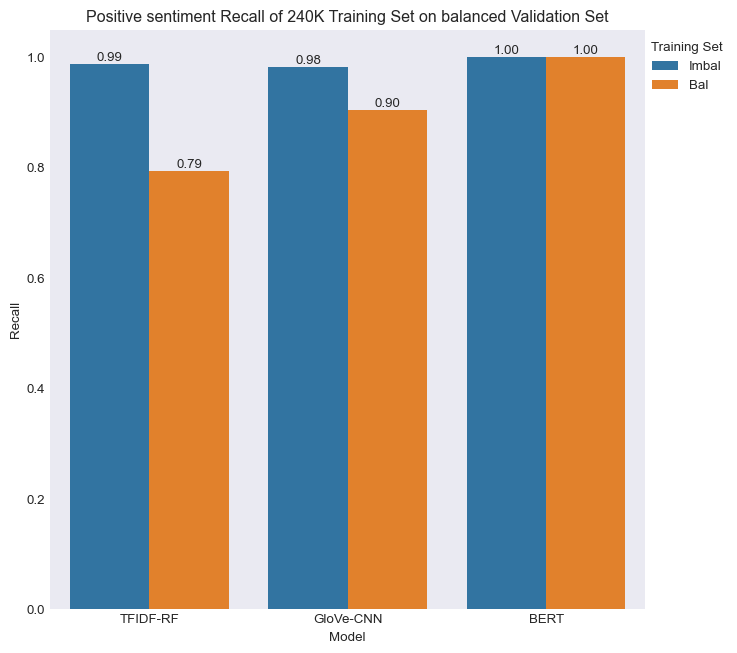

/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


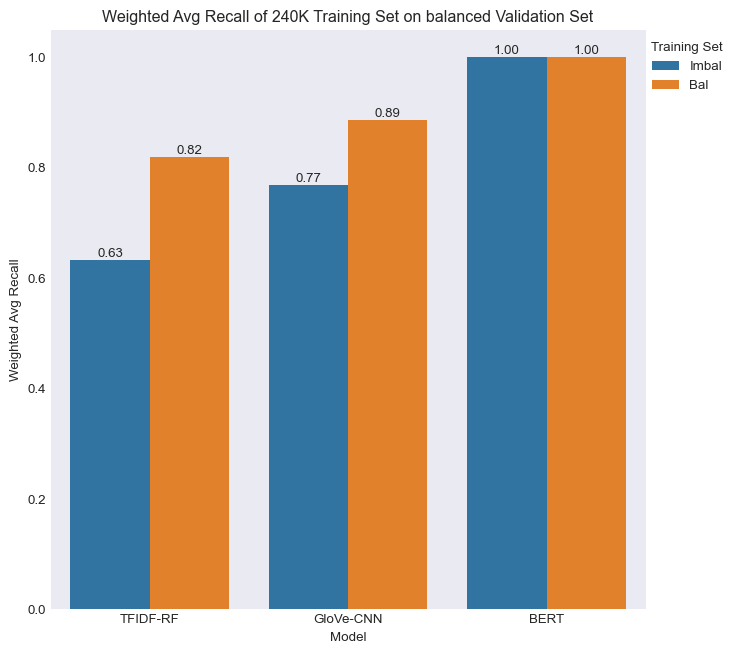

/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Figure size 768x768 with 0 Axes>

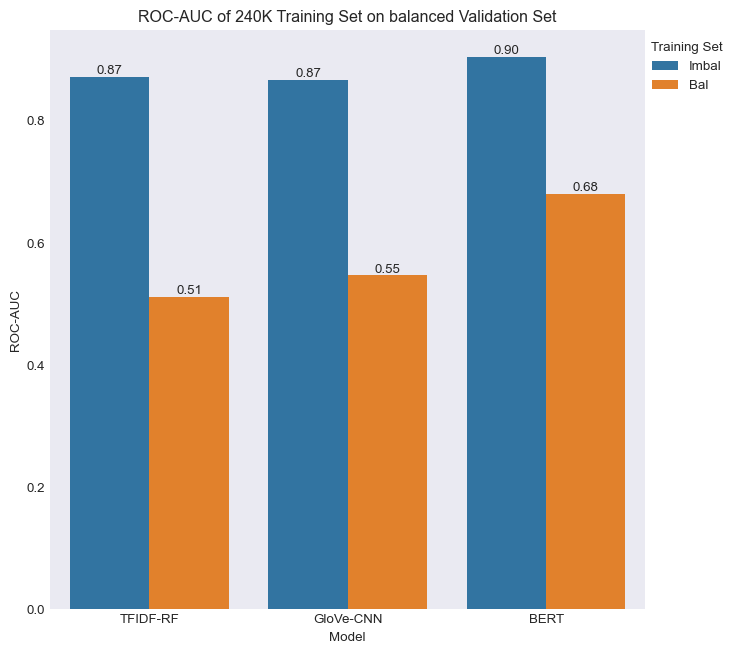

In [19]:
# create all graphs produced above
# on 240K training set

plt.figure(dpi=96, figsize=(8,8))

# call the predefined function to create the plot
create_rq01_barplot(df_240k_all_validbal, 
                    y='0-f1-score', 
                    y_label='F1-Score',
                    title='Negative sentiment F1-Score of 240K Training Set on balanced Validation Set',
                    legend_loc='best',
                    bbox_to_anchor=None,
                    save_filename='240k_all_validbal_0_f1_score.png')

create_rq01_barplot(df_240k_all_validbal,
                    y='1-f1-score', 
                    y_label='F1-Score',
                    title='Positive sentiment F1-Score of 240K Training Set on balanced Validation Set',
                    legend_loc='best',
                    bbox_to_anchor=None,
                    save_filename='240k_all_validbal_1_f1_score.png')

create_rq01_barplot(df_240k_all_validbal,
                    y='weighted avg-f1-score', 
                    y_label='Weighted Avg F1-Score',
                    title='Weighted Avg F1-Score of 240K Training Set on balanced Validation Set',
                    legend_loc='best',
                    bbox_to_anchor=None,
                    save_filename='240k_all_validbal_weighted_avg_f1_score.png')

# generate three graphs about precision on negative, positive, and weighted average

plt.figure(dpi=96, figsize=(8,8))
# f, axs = plt.subplots(1, 3, figsize=(12, 4), dpi=96)

# call predefined function to create the plot
create_rq01_barplot(df_240k_all_validbal,
                    y='0-precision', 
                    y_label='Precision',
                    title='Negative sentiment Precision of 240K Training Set on balanced Validation Set',
                    save_filename='240k_all_validbal_0_precision.png')

create_rq01_barplot(df_240k_all_validbal,
                    y='1-precision', 
                    y_label='Precision',
                    title='Positive sentiment Precision of 240K Training Set on balanced Validation Set',
                    save_filename='240k_all_validbal_1_precision.png')

create_rq01_barplot(df_240k_all_validbal,
                    y='weighted avg-precision', 
                    y_label='Weighted Avg Precision',
                    title='Weighted Avg Precision of 240K Training Set on balanced Validation Set',
                    save_filename='240k_all_validbal_weighted_avg_precision.png')



# generate three graphs about recall on negative, positive, and weighted average

plt.figure(dpi=96, figsize=(8,8))

# call predefined function to create the plot
create_rq01_barplot(df_240k_all_validbal,
                    y='0-recall', 
                    y_label='Recall',
                    title='Negative sentiment Recall of 240K Training Set on balanced Validation Set',
                    save_filename='240k_all_validbal_0_recall.png')

create_rq01_barplot(df_240k_all_validbal,
                    y='1-recall', 
                    y_label='Recall',
                    title='Positive sentiment Recall of 240K Training Set on balanced Validation Set',
                    save_filename='240k_all_validbal_1_recall.png')

create_rq01_barplot(df_240k_all_validbal,
                    y='weighted avg-recall', 
                    y_label='Weighted Avg Recall',
                    title='Weighted Avg Recall of 240K Training Set on balanced Validation Set',
                    save_filename='240k_all_validbal_weighted_avg_recall.png')

# generate a graph about roc-auc 

plt.figure(dpi=96, figsize=(8,8))

# call predefined function to create the plot
create_rq01_barplot(df_240k_all_validbal,
                    y='roc_auc', 
                    y_label='ROC-AUC',
                    title='ROC-AUC of 240K Training Set on balanced Validation Set',
                    save_filename='240k_all_validbal_roc_auc.png')

plt.show()

In [20]:
# 480K imbalanced training set
# validation result on valid_bal

list_480k_imb_all_validbal = []

for reports_dict in [tfidf_rf_reports, glove_cnn_reports, bert_reports]:
    list_480k_imb_all_validbal.append(reports_dict['valid_bal'][5])

df_480k_imb_all_validbal = pd.concat(list_480k_imb_all_validbal, axis=0).drop(columns=['Unnamed: 0']).reset_index(drop=True)
# df_480k_imb_all_validbal

# filter dfs to show precision, recall and f1-score across all classes
# imbal training set

df_480k_imb_all_validbal = df_480k_imb_all_validbal[[col for col in list(df_480k_imb_all_validbal.columns) for metric in ['precision', 'recall', 'f1-score', 'roc_auc', 'model'] if metric in col]]
df_480k_imb_all_validbal.drop(columns=['macro avg-precision', 'macro avg-recall', 'macro avg-f1-score'], inplace=True)
df_480k_imb_all_validbal

,model,0-precision,0-recall,0-f1-score,1-precision,1-recall,1-f1-score,weighted avg-precision,weighted avg-recall,weighted avg-f1-score,roc_auc
0,tfidf-rf-20000_480k_imbal,0.956686,0.318540,0.477943,0.591215,0.985578,0.739080,0.773950,0.652059,0.608512,0.874432
1,glove-cnn-20000_480k_imbal,0.949433,0.748308,0.836957,0.792305,0.960145,0.868188,0.870869,0.854226,0.852572,0.731824
2,bert-finetune_480k_imbal,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.867358


In [21]:
# 480K balanced training set
# validation result on valid_bal

list_480k_bal_all_validbal = []

for reports_dict in [tfidf_rf_reports, glove_cnn_reports, bert_reports]:
    list_480k_bal_all_validbal.append(reports_dict['valid_bal'][4])

df_480k_bal_all_validbal = pd.concat(list_480k_bal_all_validbal, axis=0).drop(columns=['Unnamed: 0']).reset_index(drop=True)
# df_480k_bal_all_validbal

# filter dfs to show precision, recall and f1-score across all classes
# bal training set

df_480k_bal_all_validbal = df_480k_bal_all_validbal[[col for col in list(df_480k_bal_all_validbal.columns) for metric in ['precision', 'recall', 'f1-score', 'roc_auc', 'model'] if metric in col]]
df_480k_bal_all_validbal.drop(columns=['macro avg-precision', 'macro avg-recall', 'macro avg-f1-score'], inplace=True)
df_480k_bal_all_validbal

,model,0-precision,0-recall,0-f1-score,1-precision,1-recall,1-f1-score,weighted avg-precision,weighted avg-recall,weighted avg-f1-score,roc_auc
0,tfidf-rf-20000_480k_bal,0.810468,0.852866,0.831127,0.844744,0.800554,0.822055,0.827606,0.826710,0.826591,0.509305
1,glove-cnn-20000_480k_bal,0.886498,0.905284,0.895793,0.903234,0.884093,0.893561,0.894866,0.894688,0.894677,0.457749
2,bert-finetune_480k_bal,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.618832


In [22]:
# concat the two dfs (first 3 is bal, last 3 is imbal)
df_480k_all_validbal = pd.concat([df_480k_bal_all_validbal, df_480k_imb_all_validbal], axis=0).reset_index(drop=True)
# create a column to identify the training set type
df_480k_all_validbal['training_set'] = ['bal'] * 3 + ['imbal'] * 3
# rename the model's name in model column by dropping bal/imbal and dataset size
df_480k_all_validbal['model'] = df_480k_all_validbal['model'].apply(lambda x: x.split('_')[0])

df_480k_all_validbal

,model,0-precision,0-recall,0-f1-score,1-precision,1-recall,1-f1-score,weighted avg-precision,weighted avg-recall,weighted avg-f1-score,roc_auc,training_set
0,tfidf-rf-20000,0.810468,0.852866,0.831127,0.844744,0.800554,0.822055,0.827606,0.826710,0.826591,0.509305,bal
1,glove-cnn-20000,0.886498,0.905284,0.895793,0.903234,0.884093,0.893561,0.894866,0.894688,0.894677,0.457749,bal
2,bert-finetune,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.618832,bal
3,tfidf-rf-20000,0.956686,0.318540,0.477943,0.591215,0.985578,0.739080,0.773950,0.652059,0.608512,0.874432,imbal
4,glove-cnn-20000,0.949433,0.748308,0.836957,0.792305,0.960145,0.868188,0.870869,0.854226,0.852572,0.731824,imbal
5,bert-finetune,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.867358,imbal


/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Figure size 768x768 with 0 Axes>

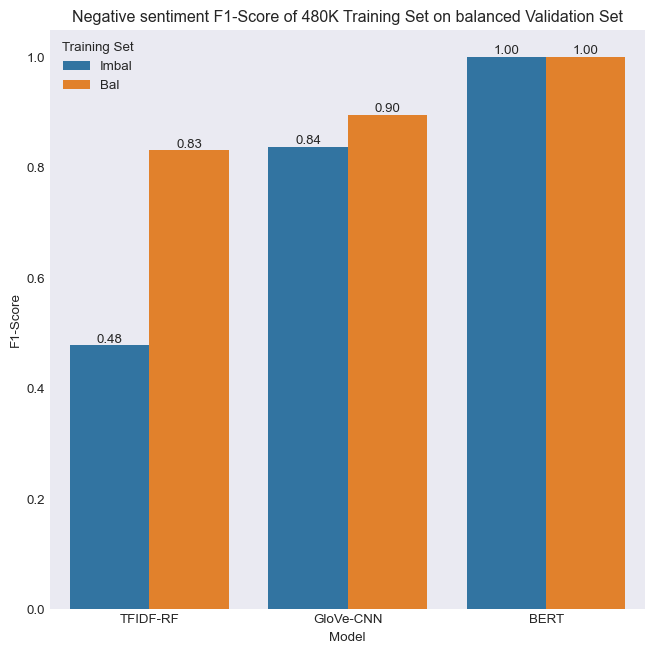

/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


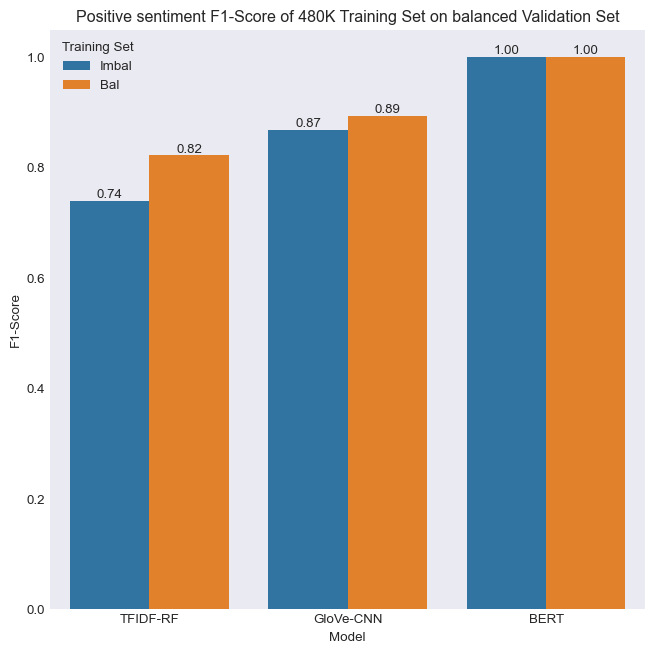

/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


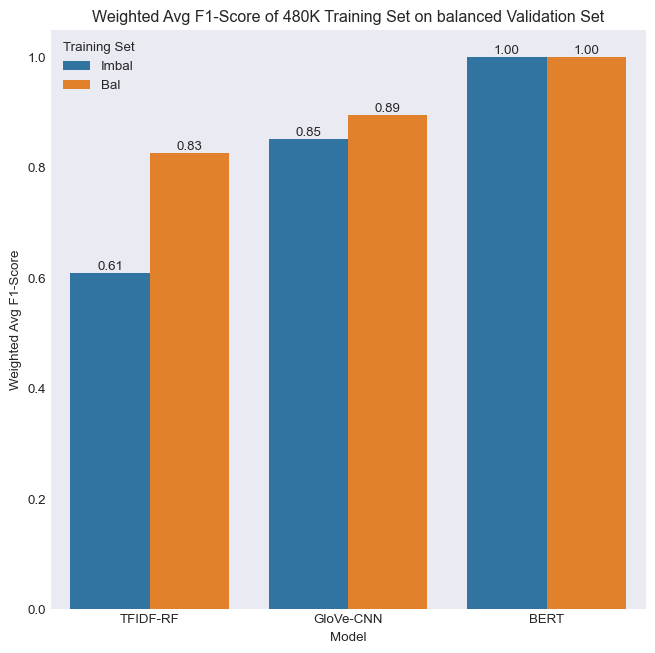

/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Figure size 768x768 with 0 Axes>

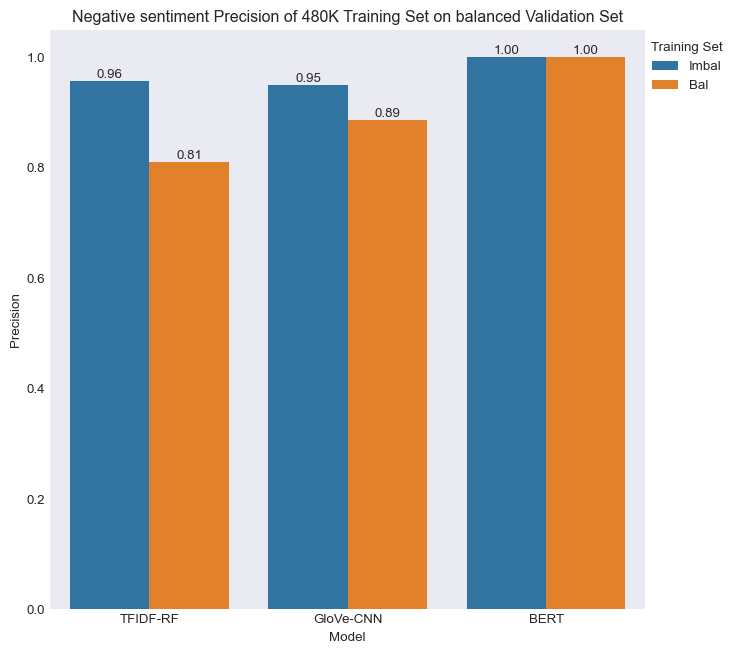

/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


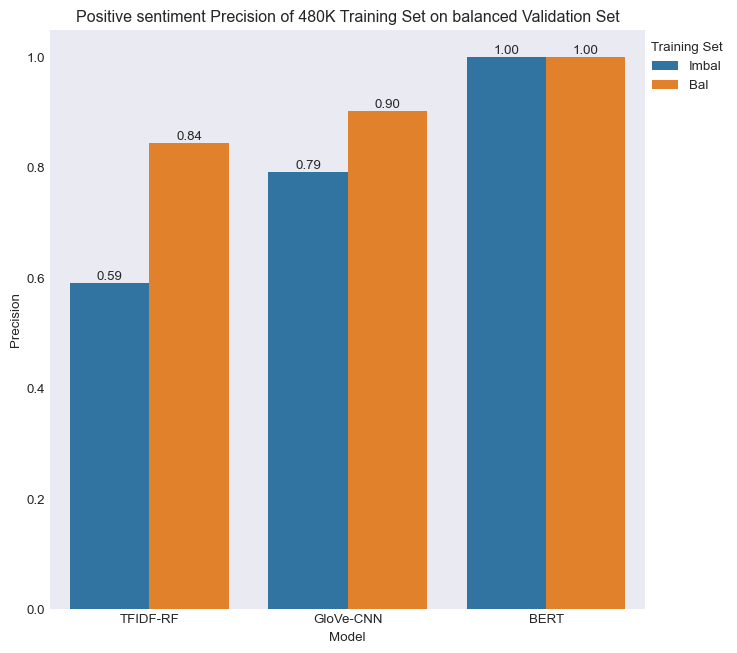

/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


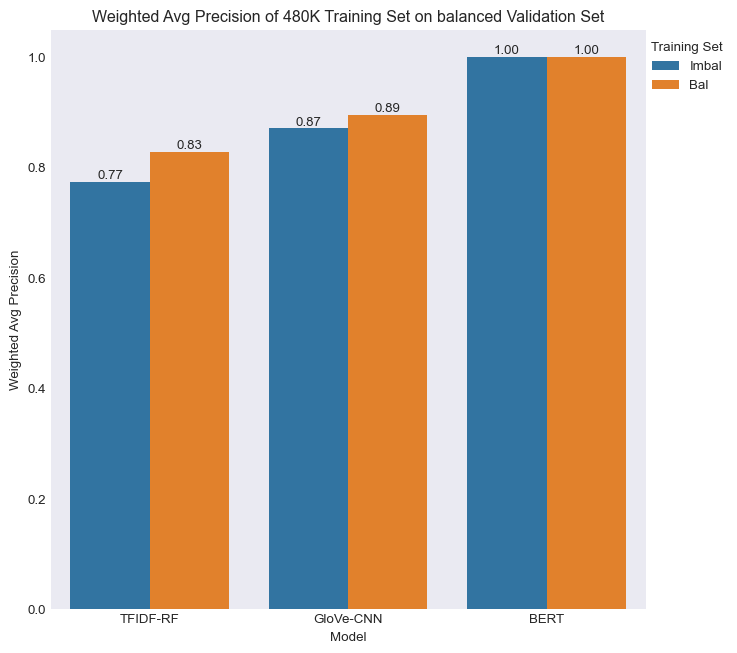

/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Figure size 768x768 with 0 Axes>

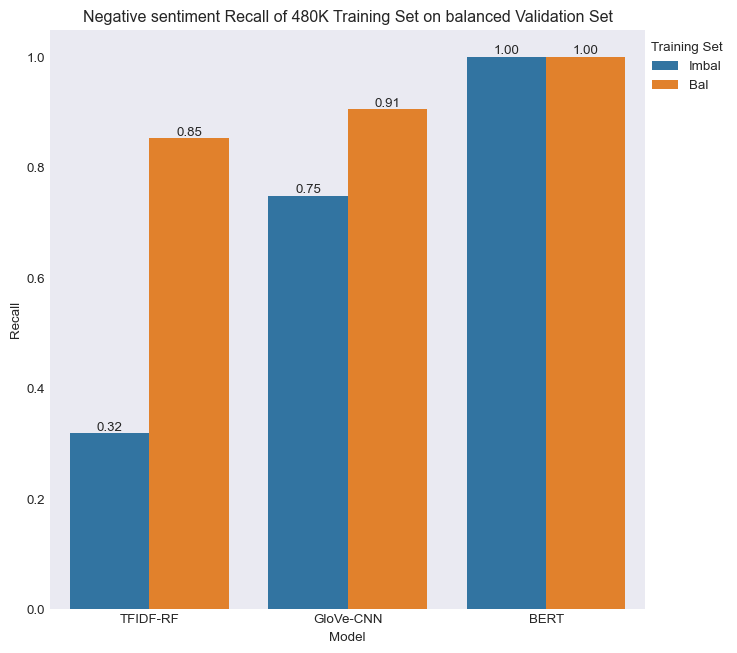

/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


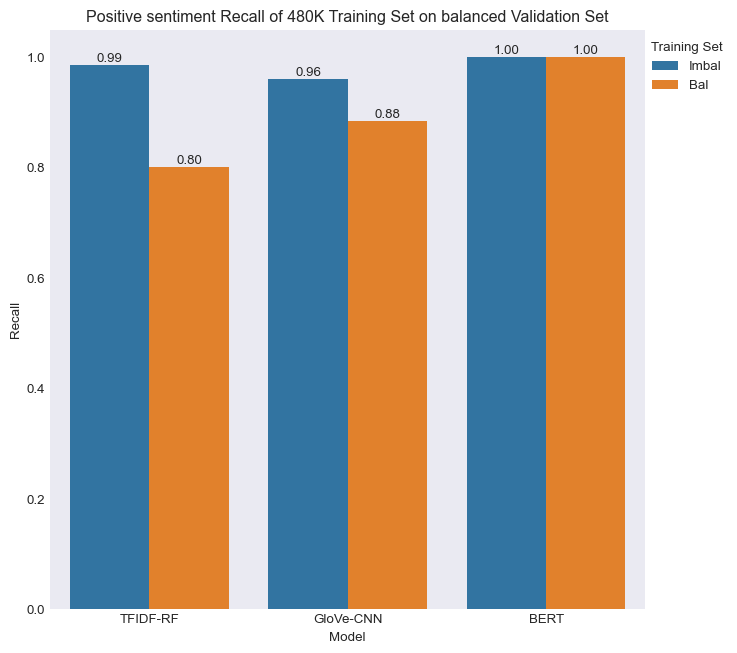

/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


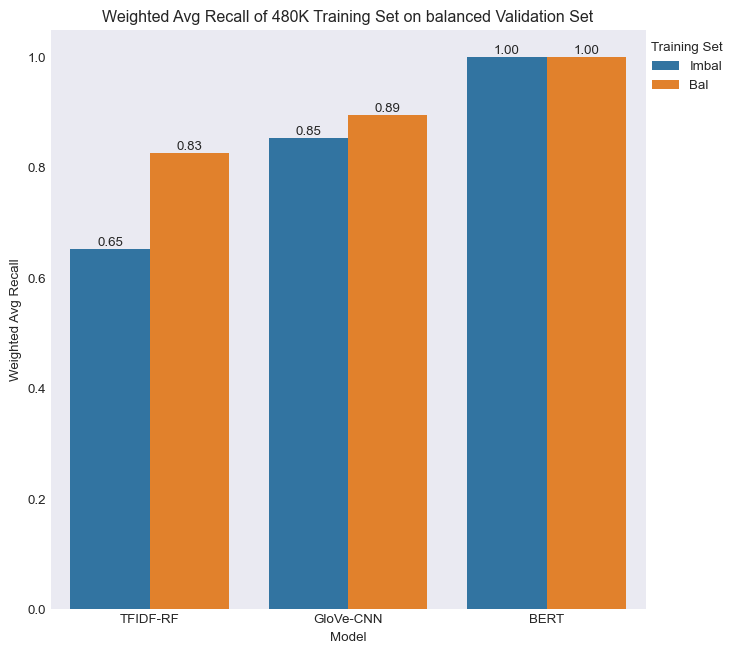

/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Figure size 768x768 with 0 Axes>

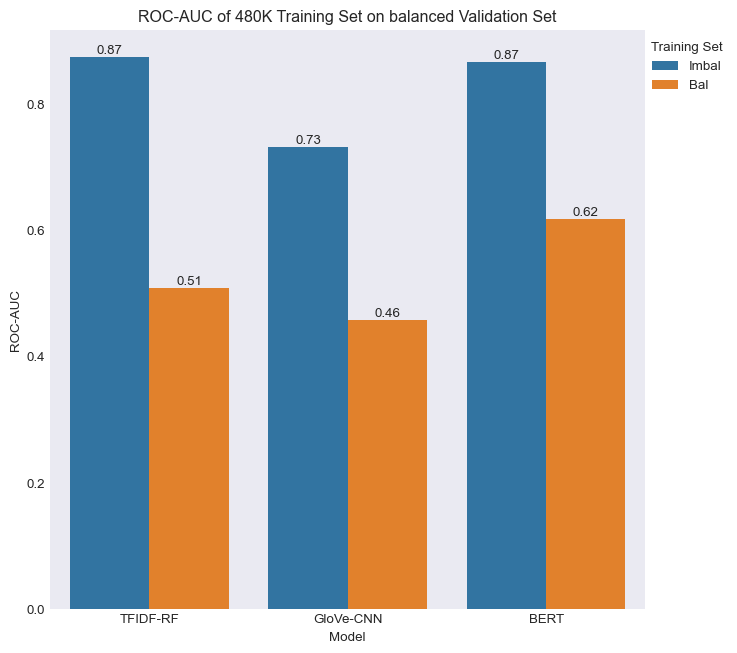

In [23]:
# create all graphs produced above
# on 480K training set

plt.figure(dpi=96, figsize=(8,8))

# call the predefined function to create the plot
create_rq01_barplot(df_480k_all_validbal, 
                    y='0-f1-score', 
                    y_label='F1-Score',
                    title='Negative sentiment F1-Score of 480K Training Set on balanced Validation Set',
                    legend_loc='best',
                    bbox_to_anchor=None,
                    save_filename='480k_all_validbal_0_f1_score.png')

create_rq01_barplot(df_480k_all_validbal,
                    y='1-f1-score', 
                    y_label='F1-Score',
                    title='Positive sentiment F1-Score of 480K Training Set on balanced Validation Set',
                    legend_loc='best',
                    bbox_to_anchor=None,
                    save_filename='480k_all_validbal_1_f1_score.png')

create_rq01_barplot(df_480k_all_validbal,
                    y='weighted avg-f1-score', 
                    y_label='Weighted Avg F1-Score',
                    title='Weighted Avg F1-Score of 480K Training Set on balanced Validation Set',
                    legend_loc='best',
                    bbox_to_anchor=None,
                    save_filename='480k_all_validbal_weighted_avg_f1_score.png')

# generate three graphs about precision on negative, positive, and weighted average

plt.figure(dpi=96, figsize=(8,8))

# call predefined function to create the plot
create_rq01_barplot(df_480k_all_validbal,
                    y='0-precision', 
                    y_label='Precision',
                    title='Negative sentiment Precision of 480K Training Set on balanced Validation Set',
                    save_filename='480k_all_validbal_0_precision.png')

create_rq01_barplot(df_480k_all_validbal,
                    y='1-precision', 
                    y_label='Precision',
                    title='Positive sentiment Precision of 480K Training Set on balanced Validation Set',
                    save_filename='480k_all_validbal_1_precision.png')

create_rq01_barplot(df_480k_all_validbal,
                    y='weighted avg-precision', 
                    y_label='Weighted Avg Precision',
                    title='Weighted Avg Precision of 480K Training Set on balanced Validation Set',
                    save_filename='480k_all_validbal_weighted_avg_precision.png')



# generate three graphs about recall on negative, positive, and weighted average

plt.figure(dpi=96, figsize=(8,8))

# call predefined function to create the plot
create_rq01_barplot(df_480k_all_validbal,
                    y='0-recall', 
                    y_label='Recall',
                    title='Negative sentiment Recall of 480K Training Set on balanced Validation Set',
                    save_filename='480k_all_validbal_0_recall.png')

create_rq01_barplot(df_480k_all_validbal,
                    y='1-recall', 
                    y_label='Recall',
                    title='Positive sentiment Recall of 480K Training Set on balanced Validation Set',
                    save_filename='480k_all_validbal_1_recall.png')

create_rq01_barplot(df_480k_all_validbal,
                    y='weighted avg-recall', 
                    y_label='Weighted Avg Recall',
                    title='Weighted Avg Recall of 480K Training Set on balanced Validation Set',
                    save_filename='480k_all_validbal_weighted_avg_recall.png')

# generate a graph about roc-auc

plt.figure(dpi=96, figsize=(8,8))

# call predefined function to create the plot
create_rq01_barplot(df_480k_all_validbal,
                    y='roc_auc', 
                    y_label='ROC-AUC',
                    title='ROC-AUC of 480K Training Set on balanced Validation Set',
                    save_filename='480k_all_validbal_roc_auc.png')

plt.show()

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

---(This is separation space)---

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

## RQ2: size matters?

do comparison on imbalanced training set and balanced training set

In [24]:
# imbalanced training set, with 120K, 240K, 480K
# validation result on valid_bal
# tfidf-rf

list_tfidfrf_imb_validbal = []

for reports_dict in [tfidf_rf_reports]:
    for ind in IMBAL_INDEXS:
        list_tfidfrf_imb_validbal.append(reports_dict['valid_bal'][ind])

df_tfidfrf_imb_validbal = pd.concat(list_tfidfrf_imb_validbal, axis=0).drop(columns=['Unnamed: 0']).reset_index(drop=True)
df_tfidfrf_imb_validbal

,model,0-precision,0-recall,0-f1-score,0-support,1-precision,1-recall,1-f1-score,1-support,accuracy,macro avg-precision,macro avg-recall,macro avg-f1-score,macro avg-support,weighted avg-precision,weighted avg-recall,weighted avg-f1-score,weighted avg-support,roc_auc
0,tfidf-rf-20000_120k_imbal,0.953804,0.255701,0.403287,150672.0,0.570245,0.987615,0.723021,150672.0,0.621658,0.762024,0.621658,0.563154,301344.0,0.762024,0.621658,0.563154,301344.0,0.867345
1,tfidf-rf-20000_240k_imbal,0.955521,0.278884,0.431754,150672.0,0.577834,0.987018,0.728929,150672.0,0.632951,0.766678,0.632951,0.580341,301344.0,0.766678,0.632951,0.580341,301344.0,0.872153
2,tfidf-rf-20000_480k_imbal,0.956686,0.318540,0.477943,150672.0,0.591215,0.985578,0.739080,150672.0,0.652059,0.773950,0.652059,0.608512,301344.0,0.773950,0.652059,0.608512,301344.0,0.874432


In [25]:
# balanced training set. with 120K, 240K, 480K
# validation result on valid_bal
# tfidf-rf

list_tfidfrf_bal_validbal = []

for reports_dict in [tfidf_rf_reports]:
    for ind in BAL_INDEXS:
        list_tfidfrf_bal_validbal.append(reports_dict['valid_bal'][ind])

df_tfidfrf_bal_validbal = pd.concat(list_tfidfrf_bal_validbal, axis=0).drop(columns=['Unnamed: 0']).reset_index(drop=True)
df_tfidfrf_bal_validbal

,model,0-precision,0-recall,0-f1-score,0-support,1-precision,1-recall,1-f1-score,1-support,accuracy,macro avg-precision,macro avg-recall,macro avg-f1-score,macro avg-support,weighted avg-precision,weighted avg-recall,weighted avg-f1-score,weighted avg-support,roc_auc
0,tfidf-rf-20000_120k_bal,0.795915,0.839997,0.817362,150672.0,0.830615,0.784612,0.806958,150672.0,0.812304,0.813265,0.812304,0.812160,301344.0,0.813265,0.812304,0.812160,301344.0,0.508543
1,tfidf-rf-20000_240k_bal,0.803702,0.844530,0.823611,150672.0,0.836209,0.793731,0.814417,150672.0,0.819130,0.819956,0.819130,0.819014,301344.0,0.819956,0.819130,0.819014,301344.0,0.511319
2,tfidf-rf-20000_480k_bal,0.810468,0.852866,0.831127,150672.0,0.844744,0.800554,0.822055,150672.0,0.826710,0.827606,0.826710,0.826591,301344.0,0.827606,0.826710,0.826591,301344.0,0.509305


In [26]:
# imbalanced training set. with 120K, 240K, 480K
# validation result on valid_bal
# glove-cnn

list_glovecnn_imb_validbal = []

for reports_dict in [glove_cnn_reports]:
    for ind in IMBAL_INDEXS:
        list_glovecnn_imb_validbal.append(reports_dict['valid_bal'][ind])

df_glovecnn_imb_validbal = pd.concat(list_glovecnn_imb_validbal, axis=0).drop(columns=['Unnamed: 0']).reset_index(drop=True)
df_glovecnn_imb_validbal

,model,0-precision,0-recall,0-f1-score,0-support,1-precision,1-recall,1-f1-score,1-support,accuracy,macro avg-precision,macro avg-recall,macro avg-f1-score,macro avg-support,weighted avg-precision,weighted avg-recall,weighted avg-f1-score,weighted avg-support,roc_auc
0,glove-cnn-20000_120k_imbal,0.952147,0.636389,0.762886,150672.0,0.726942,0.968017,0.830336,150672.0,0.802203,0.839545,0.802203,0.796611,301344.0,0.839545,0.802203,0.796611,301344.0,0.798032
1,glove-cnn-20000_240k_imbal,0.968508,0.554376,0.705133,150672.0,0.687851,0.981974,0.809009,150672.0,0.768175,0.828180,0.768175,0.757071,301344.0,0.828180,0.768175,0.757071,301344.0,0.866560
2,glove-cnn-20000_480k_imbal,0.949433,0.748308,0.836957,150672.0,0.792305,0.960145,0.868188,150672.0,0.854226,0.870869,0.854226,0.852572,301344.0,0.870869,0.854226,0.852572,301344.0,0.731824


In [27]:
# balanced training set. with 120K, 240K, 480K
# validation result on valid_bal
# glove-cnn

list_glovecnn_bal_validbal = []

for reports_dict in [glove_cnn_reports]:
    for ind in BAL_INDEXS:
        list_glovecnn_bal_validbal.append(reports_dict['valid_bal'][ind])

df_glovecnn_bal_validbal = pd.concat(list_glovecnn_bal_validbal, axis=0).drop(columns=['Unnamed: 0']).reset_index(drop=True)
df_glovecnn_bal_validbal

,model,0-precision,0-recall,0-f1-score,0-support,1-precision,1-recall,1-f1-score,1-support,accuracy,macro avg-precision,macro avg-recall,macro avg-f1-score,macro avg-support,weighted avg-precision,weighted avg-recall,weighted avg-f1-score,weighted avg-support,roc_auc
0,glove-cnn-20000_120k_bal,0.843525,0.916282,0.878399,150672.0,0.908379,0.830028,0.867438,150672.0,0.873155,0.875952,0.873155,0.872919,301344.0,0.875952,0.873155,0.872919,301344.0,0.405362
1,glove-cnn-20000_240k_bal,0.901160,0.866458,0.883468,150672.0,0.871410,0.904966,0.887871,150672.0,0.885712,0.886285,0.885712,0.885670,301344.0,0.886285,0.885712,0.885670,301344.0,0.546894
2,glove-cnn-20000_480k_bal,0.886498,0.905284,0.895793,150672.0,0.903234,0.884093,0.893561,150672.0,0.894688,0.894866,0.894688,0.894677,301344.0,0.894866,0.894688,0.894677,301344.0,0.457749


In [28]:
# imbalanced training set. with 120K, 240K, 480K
# validation result on valid_bal
# bert

list_bert_imb_validbal = []

for reports_dict in [bert_reports]:
    for ind in IMBAL_INDEXS:
        list_bert_imb_validbal.append(reports_dict['valid_bal'][ind])

df_bert_imb_validbal = pd.concat(list_bert_imb_validbal, axis=0).drop(columns=['Unnamed: 0']).reset_index(drop=True)
df_bert_imb_validbal

,model,0-precision,0-recall,0-f1-score,0-support,1-precision,1-recall,1-f1-score,1-support,accuracy,macro avg-precision,macro avg-recall,macro avg-f1-score,macro avg-support,weighted avg-precision,weighted avg-recall,weighted avg-f1-score,weighted avg-support,roc_auc
0,bert-finetune_120k_imbal,1.0,1.0,1.0,150672.0,1.0,1.0,1.0,150672.0,1.0,1.0,1.0,1.0,301344.0,1.0,1.0,1.0,301344.0,0.899224
1,bert-finetune_240k_imbal,1.0,1.0,1.0,150672.0,1.0,1.0,1.0,150672.0,1.0,1.0,1.0,1.0,301344.0,1.0,1.0,1.0,301344.0,0.904239
2,bert-finetune_480k_imbal,1.0,1.0,1.0,150672.0,1.0,1.0,1.0,150672.0,1.0,1.0,1.0,1.0,301344.0,1.0,1.0,1.0,301344.0,0.867358


In [29]:
# balanced training set. with 120K, 240K, 480K
# validation result on valid_bal
# bert

list_bert_bal_validbal = []

for reports_dict in [bert_reports]:
    for ind in BAL_INDEXS:
        list_bert_bal_validbal.append(reports_dict['valid_bal'][ind])

df_bert_bal_validbal = pd.concat(list_bert_bal_validbal, axis=0).drop(columns=['Unnamed: 0']).reset_index(drop=True)
df_bert_bal_validbal

,model,0-precision,0-recall,0-f1-score,0-support,1-precision,1-recall,1-f1-score,1-support,accuracy,macro avg-precision,macro avg-recall,macro avg-f1-score,macro avg-support,weighted avg-precision,weighted avg-recall,weighted avg-f1-score,weighted avg-support,roc_auc
0,bert-finetune_120k_bal,1.0,1.0,1.0,150672.0,1.0,1.0,1.0,150672.0,1.0,1.0,1.0,1.0,301344.0,1.0,1.0,1.0,301344.0,0.589608
1,bert-finetune_240k_bal,1.0,1.0,1.0,150672.0,1.0,1.0,1.0,150672.0,1.0,1.0,1.0,1.0,301344.0,1.0,1.0,1.0,301344.0,0.680260
2,bert-finetune_480k_bal,1.0,1.0,1.0,150672.0,1.0,1.0,1.0,150672.0,1.0,1.0,1.0,1.0,301344.0,1.0,1.0,1.0,301344.0,0.618832


### balanced training set

In [30]:
# only combine dfs with balance training set
# concat three dfs

df_bal_validbal = pd.concat([df_tfidfrf_bal_validbal, df_glovecnn_bal_validbal, df_bert_bal_validbal], axis=0).reset_index(drop=True)
# drop the bal from model column
df_bal_validbal['model'] = df_bal_validbal['model'].apply(lambda x: x[:-4])
# get the size of the training set
df_bal_validbal['training_set'] = df_bal_validbal['model'].apply(lambda x: x.split('_')[1])
# get the model name
df_bal_validbal['model'] = df_bal_validbal['model'].apply(lambda x: x.split('_')[0])
df_bal_validbal

,model,0-precision,0-recall,0-f1-score,0-support,1-precision,1-recall,1-f1-score,1-support,accuracy,macro avg-precision,macro avg-recall,macro avg-f1-score,macro avg-support,weighted avg-precision,weighted avg-recall,weighted avg-f1-score,weighted avg-support,roc_auc,training_set
0,tfidf-rf-20000,0.795915,0.839997,0.817362,150672.0,0.830615,0.784612,0.806958,150672.0,0.812304,0.813265,0.812304,0.812160,301344.0,0.813265,0.812304,0.812160,301344.0,0.508543,120k
1,tfidf-rf-20000,0.803702,0.844530,0.823611,150672.0,0.836209,0.793731,0.814417,150672.0,0.819130,0.819956,0.819130,0.819014,301344.0,0.819956,0.819130,0.819014,301344.0,0.511319,240k
2,tfidf-rf-20000,0.810468,0.852866,0.831127,150672.0,0.844744,0.800554,0.822055,150672.0,0.826710,0.827606,0.826710,0.826591,301344.0,0.827606,0.826710,0.826591,301344.0,0.509305,480k
3,glove-cnn-20000,0.843525,0.916282,0.878399,150672.0,0.908379,0.830028,0.867438,150672.0,0.873155,0.875952,0.873155,0.872919,301344.0,0.875952,0.873155,0.872919,301344.0,0.405362,120k
4,glove-cnn-20000,0.901160,0.866458,0.883468,150672.0,0.871410,0.904966,0.887871,150672.0,0.885712,0.886285,0.885712,0.885670,301344.0,0.886285,0.885712,0.885670,301344.0,0.546894,240k
5,glove-cnn-20000,0.886498,0.905284,0.895793,150672.0,0.903234,0.884093,0.893561,150672.0,0.894688,0.894866,0.894688,0.894677,301344.0,0.894866,0.894688,0.894677,301344.0,0.457749,480k
6,bert-finetune,1.000000,1.000000,1.000000,150672.0,1.000000,1.000000,1.000000,150672.0,1.000000,1.000000,1.000000,1.000000,301344.0,1.000000,1.000000,1.000000,301344.0,0.589608,120k
7,bert-finetune,1.000000,1.000000,1.000000,150672.0,1.000000,1.000000,1.000000,150672.0,1.000000,1.000000,1.000000,1.000000,301344.0,1.000000,1.000000,1.000000,301344.0,0.680260,240k
8,bert-finetune,1.000000,1.000000,1.000000,150672.0,1.000000,1.000000,1.000000,150672.0,1.000000,1.000000,1.000000,1.000000,301344.0,1.000000,1.000000,1.000000,301344.0,0.618832,480k


In [31]:
# divide the concatted df into three dfs by the model type

df_bal_validbal_tfidfrf = df_bal_validbal[df_bal_validbal['model'] == 'tfidf-rf-20000'].reset_index(drop=True)
df_bal_validbal_glovecnn = df_bal_validbal[df_bal_validbal['model'] == 'glove-cnn-20000'].reset_index(drop=True)
df_bal_validbal_bert = df_bal_validbal[df_bal_validbal['model'] == 'bert-finetune'].reset_index(drop=True)

# add column to calculate percentage change of weighted precision
df_bal_validbal_tfidfrf['weighted avg-precision perc_change'] = df_bal_validbal_tfidfrf['weighted avg-precision'].pct_change() * 100
df_bal_validbal_glovecnn['weighted avg-precision perc_change'] = df_bal_validbal_glovecnn['weighted avg-precision'].pct_change() * 100
df_bal_validbal_bert['weighted avg-precision perc_change'] = df_bal_validbal_bert['weighted avg-precision'].pct_change() * 100

# add column to calculate percentage change of weighted recall
df_bal_validbal_tfidfrf['weighted avg-recall perc_change'] = df_bal_validbal_tfidfrf['weighted avg-recall'].pct_change() * 100
df_bal_validbal_glovecnn['weighted avg-recall perc_change'] = df_bal_validbal_glovecnn['weighted avg-recall'].pct_change() * 100
df_bal_validbal_bert['weighted avg-recall perc_change'] = df_bal_validbal_bert['weighted avg-recall'].pct_change() * 100


# add a column to calculate percentage change of weighted avg-f1-score
df_bal_validbal_tfidfrf['weighted avg-f1-score perc_change'] = df_bal_validbal_tfidfrf['weighted avg-f1-score'].pct_change() * 100
df_bal_validbal_glovecnn['weighted avg-f1-score perc_change'] = df_bal_validbal_glovecnn['weighted avg-f1-score'].pct_change() * 100
df_bal_validbal_bert['weighted avg-f1-score perc_change'] = df_bal_validbal_bert['weighted avg-f1-score'].pct_change() * 100

# revelant columns to be kept (and also their order)
bal_validbal_columns_list = list(['model', 'training_set', 
                                'weighted avg-precision', 'weighted avg-precision perc_change',
                                'weighted avg-recall', 'weighted avg-recall perc_change',
                                'weighted avg-f1-score', 'weighted avg-f1-score perc_change'])

# concat the three dfs
df_bal_validbal_plotgraph = pd.concat([df_bal_validbal_tfidfrf, df_bal_validbal_glovecnn, df_bal_validbal_bert], axis=0).reset_index(drop=True)
df_bal_validbal_plotgraph

# reorder the columns (and keep only the relevant columns)
df_bal_validbal_plotgraph = df_bal_validbal_plotgraph[bal_validbal_columns_list]

# copy the perc_change to powerpoint
df_bal_validbal_plotgraph

,model,training_set,weighted avg-precision,weighted avg-precision perc_change,weighted avg-recall,weighted avg-recall perc_change,weighted avg-f1-score,weighted avg-f1-score perc_change
0,tfidf-rf-20000,120k,0.813265,NaN,0.812304,NaN,0.812160,NaN
1,tfidf-rf-20000,240k,0.819956,0.822708,0.819130,0.840336,0.819014,0.843845
2,tfidf-rf-20000,480k,0.827606,0.933006,0.826710,0.925296,0.826591,0.925199
3,glove-cnn-20000,120k,0.875952,NaN,0.873155,NaN,0.872919,NaN
4,glove-cnn-20000,240k,0.886285,1.179621,0.885712,1.438127,0.885670,1.460738
5,glove-cnn-20000,480k,0.894866,0.968198,0.894688,1.013473,0.894677,1.016972
6,bert-finetune,120k,1.000000,NaN,1.000000,NaN,1.000000,NaN
7,bert-finetune,240k,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
8,bert-finetune,480k,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000


/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

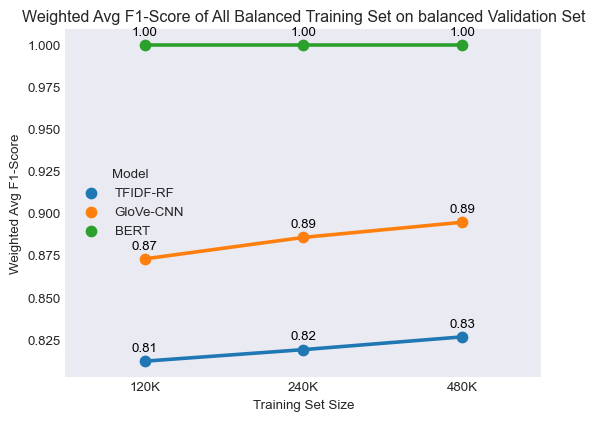

In [32]:
# create function to create rq02 pointplot
# the function uses weighted avg-f1-score as a default metric to plot

def create_rq02_pointplot(df,
                        x='training_set', y='weighted avg-f1-score', hue='model',
                        x_label='Training Set Size', y_label='Weighted Avg F1-Score',
                        title='Weighted Avg F1-Score of All Balanced Training Set on balanced Validation Set',
                        show_bar_label=False, legend_loc='best', bbox_to_anchor=None,
                        save_graphs=SAVE_GRAPHS, output_folder=rq2_output_folder, save_filename='rq02_weighted_avg_f1_score.png'):
    
    '''Create bar plot for RQ02
    Default is a barplot of weighted avg f1-score of all balanced training set on balanced validation set'''

    if save_graphs and not output_folder.exists():
        return 'Output folder does not exist'
    
    # set the figure size
    plt.figure(dpi=96, figsize=(6.4,4.8))

    # create the plot
    ax = sns.pointplot(df, x=x, y=y, hue=hue)

    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set(xticklabels=['120K', '240K', '480K'])
    h, l = ax.get_legend_handles_labels()
    ax.legend(h, ['TFIDF-RF', 'GloVe-CNN', 'BERT'], title='Model', loc=legend_loc, bbox_to_anchor=bbox_to_anchor)

    if show_bar_label:
        # for x, y, name in zip(ax.get_xticks(), df[y], df[hue]):
        #     ax.text(x, y, name, ha='center', va='bottom')

        ymin, ymax = ax.get_ylim()
        color='#000000'
        y_offset = (ymax - ymin) / 50   # scales with the data

        for _hue in df[hue].unique():
            for _x, _y in zip(ax.get_xticks(), df[df[hue] == _hue][y]):
                ax.text(_x, _y + y_offset, f'{_y:.2f}', ha='center', va='bottom', color=color)

                
    # save the plot
    if save_graphs:
        # ax.get_figure().savefig(Path.joinpath(output_folder, save_filename), bbox_inches='tight', dpi=600, facecolor='w')
        plt.savefig(Path.joinpath(output_folder, save_filename), bbox_inches='tight', dpi=600, facecolor='w')


    # show the plot
    plt.show()

# create the plot (as a sample)
create_rq02_pointplot(df_bal_validbal_plotgraph, show_bar_label=True, save_graphs=False)

/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

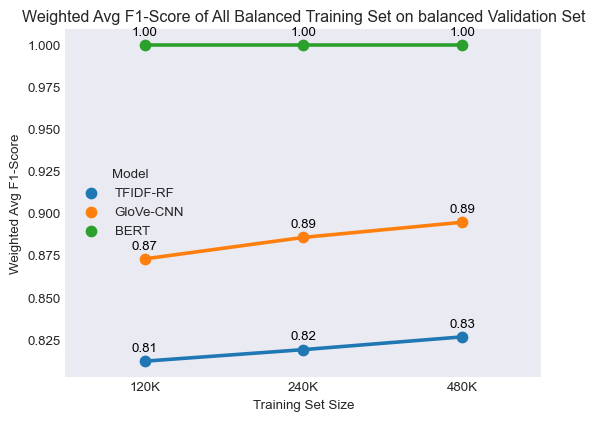

/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

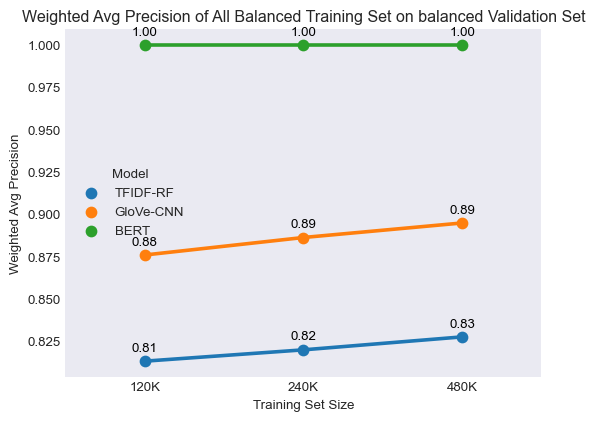

/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

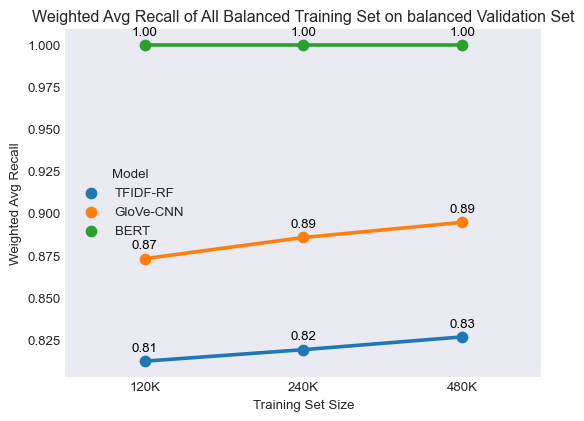

In [33]:
# create sns pointplot to compare weighted avg-f1-score across all balanced models using seaborn
# use the function created above
create_rq02_pointplot(df_bal_validbal_plotgraph, 
                    y='weighted avg-f1-score', 
                    y_label='Weighted Avg F1-Score',
                    title='Weighted Avg F1-Score of All Balanced Training Set on balanced Validation Set',
                    show_bar_label=True,
                    save_filename='bal_validbal_weighted_avg_f1_score.png')


# create sns pointplot to compare weighted avg-precision across all balanced models using seaborn
create_rq02_pointplot(df_bal_validbal_plotgraph,
                    y='weighted avg-precision', 
                    y_label='Weighted Avg Precision',
                    title='Weighted Avg Precision of All Balanced Training Set on balanced Validation Set',
                    show_bar_label=True,
                    save_filename='bal_validbal_weighted_avg_precision.png')

# create sns pointplot to compare weighted avg-recall across all balanced models using seaborn
create_rq02_pointplot(df_bal_validbal_plotgraph,
                    y='weighted avg-recall', 
                    y_label='Weighted Avg Recall',
                    title='Weighted Avg Recall of All Balanced Training Set on balanced Validation Set',
                    show_bar_label=True,
                    save_filename='bal_validbal_weighted_avg_recall.png')

### on imbal training set

In [34]:
# only combine dfs with balance training set
# concat three dfs

df_imb_validbal = pd.concat([df_tfidfrf_imb_validbal, df_glovecnn_imb_validbal, df_bert_imb_validbal], axis=0).reset_index(drop=True)
# drop the bal from model column
df_imb_validbal['model'] = df_imb_validbal['model'].apply(lambda x: x[:-4])
# get the size of the training set
df_imb_validbal['training_set'] = df_imb_validbal['model'].apply(lambda x: x.split('_')[1])
# get the model name
df_imb_validbal['model'] = df_imb_validbal['model'].apply(lambda x: x.split('_')[0])
df_imb_validbal
# divide the concatted df into three dfs by the model type

df_imb_validbal_tfidfrf = df_imb_validbal[df_imb_validbal['model'] == 'tfidf-rf-20000'].reset_index(drop=True)
df_imb_validbal_glovecnn = df_imb_validbal[df_imb_validbal['model'] == 'glove-cnn-20000'].reset_index(drop=True)
df_imb_validbal_bert = df_imb_validbal[df_imb_validbal['model'] == 'bert-finetune'].reset_index(drop=True)

# add column to calculate percentage change of weighted precision
df_imb_validbal_tfidfrf['weighted avg-precision perc_change'] = df_imb_validbal_tfidfrf['weighted avg-precision'].pct_change() * 100
df_imb_validbal_glovecnn['weighted avg-precision perc_change'] = df_imb_validbal_glovecnn['weighted avg-precision'].pct_change() * 100
df_imb_validbal_bert['weighted avg-precision perc_change'] = df_imb_validbal_bert['weighted avg-precision'].pct_change() * 100

# add column to calculate percentage change of weighted recall
df_imb_validbal_tfidfrf['weighted avg-recall perc_change'] = df_imb_validbal_tfidfrf['weighted avg-recall'].pct_change() * 100
df_imb_validbal_glovecnn['weighted avg-recall perc_change'] = df_imb_validbal_glovecnn['weighted avg-recall'].pct_change() * 100
df_imb_validbal_bert['weighted avg-recall perc_change'] = df_imb_validbal_bert['weighted avg-recall'].pct_change() * 100


# add a column to calculate percentage change of weighted avg-f1-score
df_imb_validbal_tfidfrf['weighted avg-f1-score perc_change'] = df_imb_validbal_tfidfrf['weighted avg-f1-score'].pct_change() * 100
df_imb_validbal_glovecnn['weighted avg-f1-score perc_change'] = df_imb_validbal_glovecnn['weighted avg-f1-score'].pct_change() * 100
df_imb_validbal_bert['weighted avg-f1-score perc_change'] = df_imb_validbal_bert['weighted avg-f1-score'].pct_change() * 100

# only keep revelant columns
imb_validbal_columns_list = list(['model', 'training_set', 
                                'weighted avg-precision', 'weighted avg-precision perc_change',
                                'weighted avg-recall', 'weighted avg-recall perc_change',
                                'weighted avg-f1-score', 'weighted avg-f1-score perc_change'])

# concat the three dfs
df_imb_validbal_plotgraph = pd.concat([df_imb_validbal_tfidfrf, df_imb_validbal_glovecnn, df_imb_validbal_bert], axis=0).reset_index(drop=True)
df_imb_validbal_plotgraph

# reorder the columns (and keep only the relevant columns)
df_imb_validbal_plotgraph = df_imb_validbal_plotgraph[imb_validbal_columns_list]

# copy the perc_change to powerpoint
df_imb_validbal_plotgraph

,model,training_set,weighted avg-precision,weighted avg-precision perc_change,weighted avg-recall,weighted avg-recall perc_change,weighted avg-f1-score,weighted avg-f1-score perc_change
0,tfidf-rf-20000,120k,0.762024,NaN,0.621658,NaN,0.563154,NaN
1,tfidf-rf-20000,240k,0.766678,0.610637,0.632951,1.816551,0.580341,3.051973
2,tfidf-rf-20000,480k,0.773950,0.948586,0.652059,3.018832,0.608512,4.854113
3,glove-cnn-20000,120k,0.839545,NaN,0.802203,NaN,0.796611,NaN
4,glove-cnn-20000,240k,0.828180,-1.353754,0.768175,-4.241765,0.757071,-4.963503
5,glove-cnn-20000,480k,0.870869,5.154644,0.854226,11.202022,0.852572,12.614600
6,bert-finetune,120k,1.000000,NaN,1.000000,NaN,1.000000,NaN
7,bert-finetune,240k,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
8,bert-finetune,480k,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000


/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

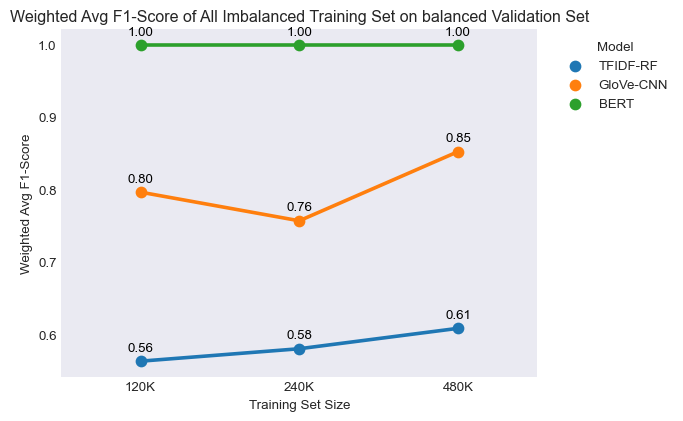

/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

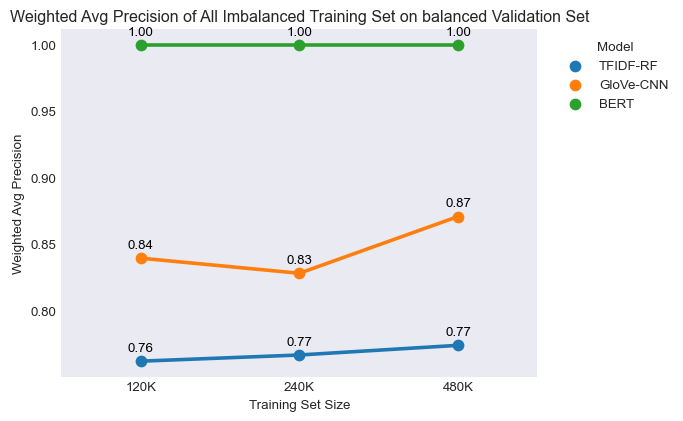

/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

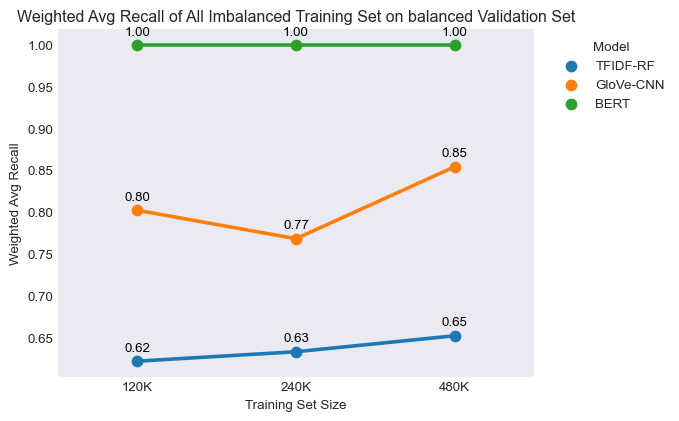

In [35]:
# create sns pointplot to compare weighted avg-f1-score across all imbalanced models using seaborn
# use the function created above
create_rq02_pointplot(df_imb_validbal_plotgraph, 
                    y='weighted avg-f1-score', 
                    y_label='Weighted Avg F1-Score',
                    title='Weighted Avg F1-Score of All Imbalanced Training Set on balanced Validation Set',
                    show_bar_label=True, legend_loc='upper right', bbox_to_anchor=(1.3, 1),
                    save_filename='imb_validbal_weighted_avg_f1_score.png')


# create sns pointplot to compare weighted avg-precision across all imbalanced models using seaborn
create_rq02_pointplot(df_imb_validbal_plotgraph,
                    y='weighted avg-precision', 
                    y_label='Weighted Avg Precision',
                    title='Weighted Avg Precision of All Imbalanced Training Set on balanced Validation Set',
                    show_bar_label=True, legend_loc='upper right', bbox_to_anchor=(1.3, 1),
                    save_filename='imb_validbal_weighted_avg_precision.png')

# create sns pointplot to compare weighted avg-recall across all imbalanced models using seaborn
create_rq02_pointplot(df_imb_validbal_plotgraph,
                    y='weighted avg-recall', 
                    y_label='Weighted Avg Recall',
                    title='Weighted Avg Recall of All Imbalanced Training Set on balanced Validation Set',
                    show_bar_label=True, legend_loc='upper right', bbox_to_anchor=(1.3, 1),
                    save_filename='imb_validbal_weighted_avg_recall.png')

Conclusion:

size matters, (quote percentage improvement)

But not shown in BERT, as all fine-tuned models have size way above recommendations (recommend: at least 10K data for finetune, 100k+ data is less sensitive to hyperparameter selection)
even the 120k_bal training set has 50≤ comments for each positive and negative sentiment

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

---(This is separation space)---

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

## RQ3: best model in real-life situation?

define what's the 'best'? We mean weighted F1-score. (i.e. treating positive and negative sentiment sentences with equal importance)

ROC-AUC is not that accurate/suitable as it's biased towards models trained with imbalanced trainingset, but balanced trainingset is okay

In [36]:
# balanced training set, all size
# validation result on valid_imbal

list_bal_all_validimbal = []

for reports_dict in [tfidf_rf_reports, glove_cnn_reports, bert_reports]:
    for ind in BAL_INDEXS:
        list_bal_all_validimbal.append(reports_dict['valid_imbal'][ind])

df_bal_all_validimbal = pd.concat(list_bal_all_validimbal, axis=0).drop(columns=['Unnamed: 0']).reset_index(drop=True)
df_bal_all_validimbal

,model,0-precision,0-recall,0-f1-score,0-support,1-precision,1-recall,1-f1-score,1-support,accuracy,macro avg-precision,macro avg-recall,macro avg-f1-score,macro avg-support,weighted avg-precision,weighted avg-recall,weighted avg-f1-score,weighted avg-support,roc_auc
0,tfidf-rf-20000_120k_bal,0.433456,0.838764,0.571548,150928.0,0.961571,0.786329,0.865165,774377.0,0.794882,0.697514,0.812547,0.718357,925305.0,0.875430,0.794882,0.817273,925305.0,0.510759
1,tfidf-rf-20000_240k_bal,0.445823,0.845509,0.583812,150928.0,0.963514,0.795157,0.871277,774377.0,0.803370,0.704668,0.820333,0.727544,925305.0,0.879073,0.803370,0.824388,925305.0,0.513082
2,tfidf-rf-20000_480k_bal,0.456630,0.852440,0.594697,150928.0,0.965394,0.802298,0.876322,774377.0,0.810477,0.711012,0.827369,0.735509,925305.0,0.882408,0.810477,0.830385,925305.0,0.510722
3,glove-cnn-20000_120k_bal,0.512512,0.916629,0.657435,150928.0,0.980800,0.830070,0.899162,774377.0,0.844189,0.746656,0.873349,0.778298,925305.0,0.904417,0.844189,0.859733,925305.0,0.406301
4,glove-cnn-20000_240k_bal,0.640062,0.866035,0.736096,150928.0,0.971961,0.905080,0.937329,774377.0,0.898711,0.806011,0.885558,0.836713,925305.0,0.917824,0.898711,0.904505,925305.0,0.548144
5,glove-cnn-20000_480k_bal,0.604720,0.904809,0.724936,150928.0,0.979460,0.884728,0.929687,774377.0,0.888003,0.792090,0.894768,0.827312,925305.0,0.918336,0.888003,0.896290,925305.0,0.459079
6,bert-finetune_120k_bal,1.000000,1.000000,1.000000,150928.0,1.000000,1.000000,1.000000,774377.0,1.000000,1.000000,1.000000,1.000000,925305.0,1.000000,1.000000,1.000000,925305.0,0.591159
7,bert-finetune_240k_bal,1.000000,1.000000,1.000000,150928.0,1.000000,1.000000,1.000000,774377.0,1.000000,1.000000,1.000000,1.000000,925305.0,1.000000,1.000000,1.000000,925305.0,0.682009
8,bert-finetune_480k_bal,1.000000,1.000000,1.000000,150928.0,1.000000,1.000000,1.000000,774377.0,1.000000,1.000000,1.000000,1.000000,925305.0,1.000000,1.000000,1.000000,925305.0,0.620988


In [37]:
# imbalanced training set, all size
# validation result on valid_imbal

list_imb_all_validimbal = []

for reports_dict in [tfidf_rf_reports, glove_cnn_reports, bert_reports]:
    for ind in IMBAL_INDEXS:
        list_imb_all_validimbal.append(reports_dict['valid_imbal'][ind])

df_imb_all_validimbal = pd.concat(list_imb_all_validimbal, axis=0).drop(columns=['Unnamed: 0']).reset_index(drop=True)
df_imb_all_validimbal

,model,0-precision,0-recall,0-f1-score,0-support,1-precision,1-recall,1-f1-score,1-support,accuracy,macro avg-precision,macro avg-recall,macro avg-f1-score,macro avg-support,weighted avg-precision,weighted avg-recall,weighted avg-f1-score,weighted avg-support,roc_auc
0,tfidf-rf-20000_120k_imbal,0.795351,0.253664,0.384650,150928.0,0.871583,0.987279,0.925831,774377.0,0.867618,0.833467,0.620471,0.655240,925305.0,0.859149,0.867618,0.837558,925305.0,0.867262
1,tfidf-rf-20000_240k_imbal,0.810380,0.277980,0.413962,150928.0,0.875250,0.987323,0.927915,774377.0,0.871621,0.842815,0.632651,0.670938,925305.0,0.864669,0.871621,0.844083,925305.0,0.872778
2,tfidf-rf-20000_480k_imbal,0.816600,0.318496,0.458259,150928.0,0.881287,0.986058,0.930733,774377.0,0.877171,0.848943,0.652277,0.694496,925305.0,0.870735,0.877171,0.853667,925305.0,0.875397
3,glove-cnn-20000_120k_imbal,0.798045,0.634077,0.706675,150928.0,0.931427,0.968726,0.949710,774377.0,0.914141,0.864736,0.801402,0.828192,925305.0,0.909671,0.914141,0.910068,925305.0,0.798977
4,glove-cnn-20000_240k_imbal,0.857206,0.554417,0.673338,150928.0,0.918748,0.982000,0.949322,774377.0,0.912256,0.887977,0.768208,0.811330,925305.0,0.908710,0.912256,0.904305,925305.0,0.866909
5,glove-cnn-20000_480k_imbal,0.782517,0.747323,0.764515,150928.0,0.951181,0.959518,0.955331,774377.0,0.924907,0.866849,0.853421,0.859923,925305.0,0.923670,0.924907,0.924207,925305.0,0.732145
6,bert-finetune_120k_imbal,1.000000,1.000000,1.000000,150928.0,1.000000,1.000000,1.000000,774377.0,1.000000,1.000000,1.000000,1.000000,925305.0,1.000000,1.000000,1.000000,925305.0,0.899809
7,bert-finetune_240k_imbal,1.000000,1.000000,1.000000,150928.0,1.000000,1.000000,1.000000,774377.0,1.000000,1.000000,1.000000,1.000000,925305.0,1.000000,1.000000,1.000000,925305.0,0.904782
8,bert-finetune_480k_imbal,1.000000,1.000000,1.000000,150928.0,1.000000,1.000000,1.000000,774377.0,1.000000,1.000000,1.000000,1.000000,925305.0,1.000000,1.000000,1.000000,925305.0,0.867772


as in RQ1, models with balanced trainingset typically outperformed that with imbalanced trainingset

hence our focus will be only models with balanced training set

In [38]:
# drop the imbal from model column
df_bal_all_validimbal['model'] = df_bal_all_validimbal['model'].apply(lambda x: x[:-5])
# get the size of the training set
df_bal_all_validimbal['training_set'] = df_bal_all_validimbal['model'].apply(lambda x: x.split('_')[1])
# get the model name
df_bal_all_validimbal['model'] = df_bal_all_validimbal['model'].apply(lambda x: x.split('_')[0])
df_bal_all_validimbal

,model,0-precision,0-recall,0-f1-score,0-support,1-precision,1-recall,1-f1-score,1-support,accuracy,macro avg-precision,macro avg-recall,macro avg-f1-score,macro avg-support,weighted avg-precision,weighted avg-recall,weighted avg-f1-score,weighted avg-support,roc_auc,training_set
0,tfidf-rf-20000,0.433456,0.838764,0.571548,150928.0,0.961571,0.786329,0.865165,774377.0,0.794882,0.697514,0.812547,0.718357,925305.0,0.875430,0.794882,0.817273,925305.0,0.510759,120
1,tfidf-rf-20000,0.445823,0.845509,0.583812,150928.0,0.963514,0.795157,0.871277,774377.0,0.803370,0.704668,0.820333,0.727544,925305.0,0.879073,0.803370,0.824388,925305.0,0.513082,240
2,tfidf-rf-20000,0.456630,0.852440,0.594697,150928.0,0.965394,0.802298,0.876322,774377.0,0.810477,0.711012,0.827369,0.735509,925305.0,0.882408,0.810477,0.830385,925305.0,0.510722,480
3,glove-cnn-20000,0.512512,0.916629,0.657435,150928.0,0.980800,0.830070,0.899162,774377.0,0.844189,0.746656,0.873349,0.778298,925305.0,0.904417,0.844189,0.859733,925305.0,0.406301,120
4,glove-cnn-20000,0.640062,0.866035,0.736096,150928.0,0.971961,0.905080,0.937329,774377.0,0.898711,0.806011,0.885558,0.836713,925305.0,0.917824,0.898711,0.904505,925305.0,0.548144,240
5,glove-cnn-20000,0.604720,0.904809,0.724936,150928.0,0.979460,0.884728,0.929687,774377.0,0.888003,0.792090,0.894768,0.827312,925305.0,0.918336,0.888003,0.896290,925305.0,0.459079,480
6,bert-finetune,1.000000,1.000000,1.000000,150928.0,1.000000,1.000000,1.000000,774377.0,1.000000,1.000000,1.000000,1.000000,925305.0,1.000000,1.000000,1.000000,925305.0,0.591159,120
7,bert-finetune,1.000000,1.000000,1.000000,150928.0,1.000000,1.000000,1.000000,774377.0,1.000000,1.000000,1.000000,1.000000,925305.0,1.000000,1.000000,1.000000,925305.0,0.682009,240
8,bert-finetune,1.000000,1.000000,1.000000,150928.0,1.000000,1.000000,1.000000,774377.0,1.000000,1.000000,1.000000,1.000000,925305.0,1.000000,1.000000,1.000000,925305.0,0.620988,480


/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

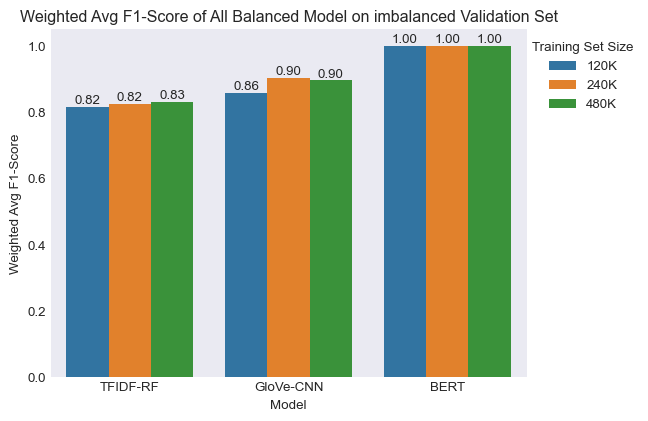

In [44]:
# plot a barchart to compare weighted avg-f1-score across all balanced models using seaborn

plt.figure(dpi=96, figsize=(6.4,4.8))

# create the plot
ax = sns.barplot(data=df_bal_all_validimbal, x='model', y='weighted avg-f1-score', hue='training_set')

ax.set_title('Weighted Avg F1-Score of All Balanced Model on imbalanced Validation Set')
ax.set_xlabel('Model')
ax.set_ylabel('Weighted Avg F1-Score')
ax.set_xticklabels(['TFIDF-RF', 'GloVe-CNN', 'BERT'])
h, l = ax.get_legend_handles_labels()
ax.legend(h, ['120K', '240K', '480K'], title='Training Set Size', loc='upper right', bbox_to_anchor=(1.25, 1))

ax.bar_label(ax.containers[0], fmt='%.2f')
ax.bar_label(ax.containers[1], fmt='%.2f')
ax.bar_label(ax.containers[2], fmt='%.2f')


if SAVE_GRAPHS:
    # ax.get_figure().savefig(
    #     Path.joinpath(rq3_output_folder, 'bal_validimb_weighted_avg_f1_score.png'),
    #     dpi=600, facecolor='w', bbox_inches='tight')
    
    plt.savefig(
        Path.joinpath(rq3_output_folder, 'bal_validimb_weighted_avg_f1_score.png'),
        dpi=600, facecolor='w', bbox_inches='tight')
    
    
# show the plot
plt.show()

/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

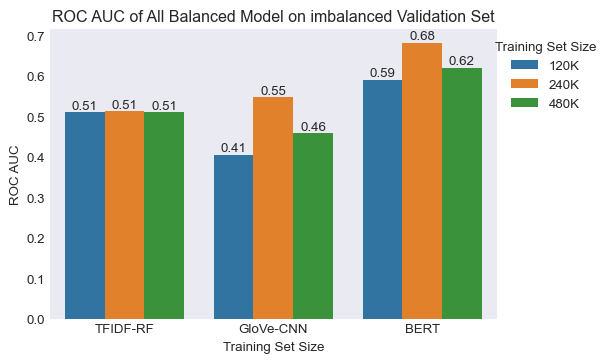

In [45]:
# plot roc_auc on all balanced models using seaborn

plt.figure(dpi=96)

ax = sns.barplot(data=df_bal_all_validimbal, x='model', y='roc_auc', hue='training_set')

ax.set_title('ROC AUC of All Balanced Model on imbalanced Validation Set')
ax.set_xlabel('Training Set Size')
ax.set_ylabel('ROC AUC')
ax.set_xticklabels(['TFIDF-RF', 'GloVe-CNN', 'BERT'])
h, l = ax.get_legend_handles_labels()
ax.legend(h, ['120K', '240K', '480K'], title='Training Set Size', loc='upper right', bbox_to_anchor=(1.25, 1))

ax.bar_label(ax.containers[0], fmt='%.2f')
ax.bar_label(ax.containers[1], fmt='%.2f')
ax.bar_label(ax.containers[2], fmt='%.2f')


if SAVE_GRAPHS:
    # ax.get_figure().savefig(
    #     Path.joinpath(rq3_output_folder, 'bal_validimb_roc_auc.png'),
    #     dpi=600, facecolor='w', bbox_inches='tight')
    
    plt.savefig(
        Path.joinpath(rq3_output_folder, 'bal_validimb_roc_auc.png'),
        dpi=600, facecolor='w', bbox_inches='tight')

plt.show()

Conclusion

BERT simpily outscore other models, achieving astonishingly perfect score in our dataset XDD

240K achieved highest ROC-AUC among the all BERT models with balanced training set

&nbsp;

&nbsp;

&nbsp;

&nbsp;

---(This is separation space)---

&nbsp;

&nbsp;

&nbsp;

&nbsp;

how about those with imbalanced training set?

In [41]:
# drop the imbal from model column
df_imb_all_validimbal['model'] = df_imb_all_validimbal['model'].apply(lambda x: x[:-5])
# get the size of the training set
df_imb_all_validimbal['training_set'] = df_imb_all_validimbal['model'].apply(lambda x: x.split('_')[1])
# get the model name
df_imb_all_validimbal['model'] = df_imb_all_validimbal['model'].apply(lambda x: x.split('_')[0])
df_imb_all_validimbal

,model,0-precision,0-recall,0-f1-score,0-support,1-precision,1-recall,1-f1-score,1-support,accuracy,macro avg-precision,macro avg-recall,macro avg-f1-score,macro avg-support,weighted avg-precision,weighted avg-recall,weighted avg-f1-score,weighted avg-support,roc_auc,training_set
0,tfidf-rf-20000,0.795351,0.253664,0.384650,150928.0,0.871583,0.987279,0.925831,774377.0,0.867618,0.833467,0.620471,0.655240,925305.0,0.859149,0.867618,0.837558,925305.0,0.867262,120k
1,tfidf-rf-20000,0.810380,0.277980,0.413962,150928.0,0.875250,0.987323,0.927915,774377.0,0.871621,0.842815,0.632651,0.670938,925305.0,0.864669,0.871621,0.844083,925305.0,0.872778,240k
2,tfidf-rf-20000,0.816600,0.318496,0.458259,150928.0,0.881287,0.986058,0.930733,774377.0,0.877171,0.848943,0.652277,0.694496,925305.0,0.870735,0.877171,0.853667,925305.0,0.875397,480k
3,glove-cnn-20000,0.798045,0.634077,0.706675,150928.0,0.931427,0.968726,0.949710,774377.0,0.914141,0.864736,0.801402,0.828192,925305.0,0.909671,0.914141,0.910068,925305.0,0.798977,120k
4,glove-cnn-20000,0.857206,0.554417,0.673338,150928.0,0.918748,0.982000,0.949322,774377.0,0.912256,0.887977,0.768208,0.811330,925305.0,0.908710,0.912256,0.904305,925305.0,0.866909,240k
5,glove-cnn-20000,0.782517,0.747323,0.764515,150928.0,0.951181,0.959518,0.955331,774377.0,0.924907,0.866849,0.853421,0.859923,925305.0,0.923670,0.924907,0.924207,925305.0,0.732145,480k
6,bert-finetune,1.000000,1.000000,1.000000,150928.0,1.000000,1.000000,1.000000,774377.0,1.000000,1.000000,1.000000,1.000000,925305.0,1.000000,1.000000,1.000000,925305.0,0.899809,120k
7,bert-finetune,1.000000,1.000000,1.000000,150928.0,1.000000,1.000000,1.000000,774377.0,1.000000,1.000000,1.000000,1.000000,925305.0,1.000000,1.000000,1.000000,925305.0,0.904782,240k
8,bert-finetune,1.000000,1.000000,1.000000,150928.0,1.000000,1.000000,1.000000,774377.0,1.000000,1.000000,1.000000,1.000000,925305.0,1.000000,1.000000,1.000000,925305.0,0.867772,480k


In [ ]:
df_imb_all_validimbal['training_set'] = df_imb_all_validimbal['training_set'].apply(lambda x: int(x[:-1]))


/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

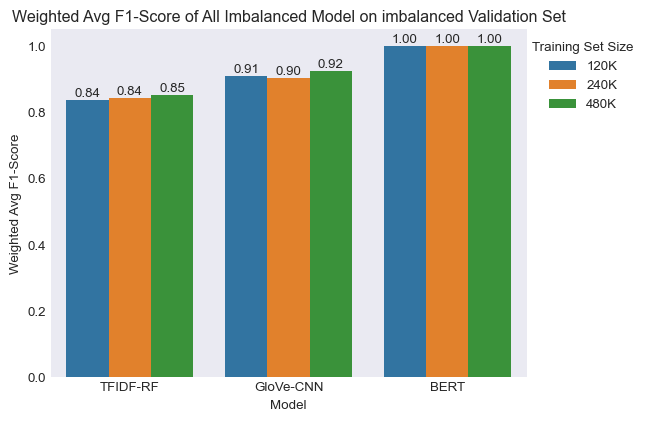

In [46]:
# plot a barchart to compare weighted avg-f1-score across all imbalanced models using seaborn

plt.figure(dpi=96, figsize=(6.4,4.8))

# create the plot
ax = sns.barplot(data=df_imb_all_validimbal, x='model', y='weighted avg-f1-score', hue='training_set')

ax.set_title('Weighted Avg F1-Score of All Imbalanced Model on imbalanced Validation Set')
ax.set_xlabel('Model')
ax.set_ylabel('Weighted Avg F1-Score')
ax.set_xticklabels(['TFIDF-RF', 'GloVe-CNN', 'BERT'])
h, l = ax.get_legend_handles_labels()
ax.legend(h, ['120K', '240K', '480K'], title='Training Set Size', loc='upper right', bbox_to_anchor=(1.25, 1))

ax.bar_label(ax.containers[0], fmt='%.2f')
ax.bar_label(ax.containers[1], fmt='%.2f')
ax.bar_label(ax.containers[2], fmt='%.2f')


if SAVE_GRAPHS:
    # ax.get_figure().savefig(
    #     Path.joinpath(rq3_output_folder, 'imb_validimb_weighted_avg_f1_score.png'),
    #     dpi=600, facecolor='w', bbox_inches='tight')
    
    plt.savefig(
        Path.joinpath(rq3_output_folder, 'imb_validimb_weighted_avg_f1_score.png'),
        dpi=600, facecolor='w', bbox_inches='tight')


# show the plot
plt.show()

/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

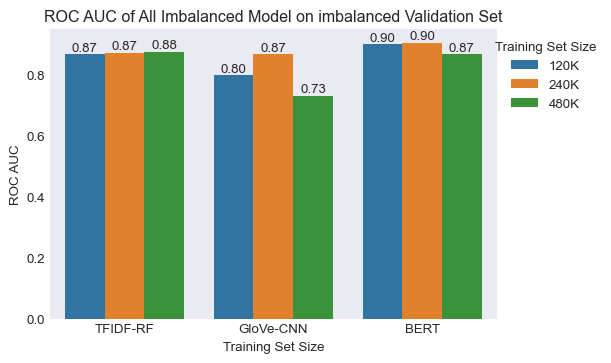

In [47]:
# plot roc_auc on all models with imbalanced trainingset

plt.figure(dpi=96)

ax = sns.barplot(data=df_imb_all_validimbal, x='model', y='roc_auc', hue='training_set')

ax.set_title('ROC AUC of All Imbalanced Model on imbalanced Validation Set')
ax.set_xlabel('Training Set Size')
ax.set_ylabel('ROC AUC')
ax.set_xticklabels(['TFIDF-RF', 'GloVe-CNN', 'BERT'])
h, l = ax.get_legend_handles_labels()
ax.legend(h, ['120K', '240K', '480K'], title='Training Set Size', loc='upper right', bbox_to_anchor=(1.25, 1))

ax.bar_label(ax.containers[0], fmt='%.2f')
ax.bar_label(ax.containers[1], fmt='%.2f')
ax.bar_label(ax.containers[2], fmt='%.2f')


if SAVE_GRAPHS:
    # ax.get_figure().savefig(
    #     Path.joinpath(rq3_output_folder, 'imb_validimb_roc_auc.png'),
    #     dpi=600, facecolor='w', bbox_inches='tight')
    
    plt.savefig(
        Path.joinpath(rq3_output_folder, 'imb_validimb_roc_auc.png'),
        dpi=600, facecolor='w', bbox_inches='tight')


plt.show()

How about ROC-AUC of all balanced model on balanced validation set.

In [13]:
list_bal_all_validbal = []

for reports_dict in [tfidf_rf_reports, glove_cnn_reports, bert_reports]:
    for ind in BAL_INDEXS:
        list_bal_all_validbal.append(reports_dict['valid_bal'][ind])

df_bal_all_validbal = pd.concat(list_bal_all_validbal, axis=0).drop(columns=['Unnamed: 0']).reset_index(drop=True)
df_bal_all_validbal

,model,0-precision,0-recall,0-f1-score,0-support,1-precision,1-recall,1-f1-score,1-support,accuracy,macro avg-precision,macro avg-recall,macro avg-f1-score,macro avg-support,weighted avg-precision,weighted avg-recall,weighted avg-f1-score,weighted avg-support,roc_auc
0,tfidf-rf-20000_120k_bal,0.795915,0.839997,0.817362,150672.0,0.830615,0.784612,0.806958,150672.0,0.812304,0.813265,0.812304,0.812160,301344.0,0.813265,0.812304,0.812160,301344.0,0.508543
1,tfidf-rf-20000_240k_bal,0.803702,0.844530,0.823611,150672.0,0.836209,0.793731,0.814417,150672.0,0.819130,0.819956,0.819130,0.819014,301344.0,0.819956,0.819130,0.819014,301344.0,0.511319
2,tfidf-rf-20000_480k_bal,0.810468,0.852866,0.831127,150672.0,0.844744,0.800554,0.822055,150672.0,0.826710,0.827606,0.826710,0.826591,301344.0,0.827606,0.826710,0.826591,301344.0,0.509305
3,glove-cnn-20000_120k_bal,0.843525,0.916282,0.878399,150672.0,0.908379,0.830028,0.867438,150672.0,0.873155,0.875952,0.873155,0.872919,301344.0,0.875952,0.873155,0.872919,301344.0,0.405362
4,glove-cnn-20000_240k_bal,0.901160,0.866458,0.883468,150672.0,0.871410,0.904966,0.887871,150672.0,0.885712,0.886285,0.885712,0.885670,301344.0,0.886285,0.885712,0.885670,301344.0,0.546894
5,glove-cnn-20000_480k_bal,0.886498,0.905284,0.895793,150672.0,0.903234,0.884093,0.893561,150672.0,0.894688,0.894866,0.894688,0.894677,301344.0,0.894866,0.894688,0.894677,301344.0,0.457749
6,bert-finetune_120k_bal,1.000000,1.000000,1.000000,150672.0,1.000000,1.000000,1.000000,150672.0,1.000000,1.000000,1.000000,1.000000,301344.0,1.000000,1.000000,1.000000,301344.0,0.589608
7,bert-finetune_240k_bal,1.000000,1.000000,1.000000,150672.0,1.000000,1.000000,1.000000,150672.0,1.000000,1.000000,1.000000,1.000000,301344.0,1.000000,1.000000,1.000000,301344.0,0.680260
8,bert-finetune_480k_bal,1.000000,1.000000,1.000000,150672.0,1.000000,1.000000,1.000000,150672.0,1.000000,1.000000,1.000000,1.000000,301344.0,1.000000,1.000000,1.000000,301344.0,0.618832


In [15]:
# drop the imbal from model column
df_bal_all_validbal['model'] = df_bal_all_validbal['model'].apply(lambda x: x[:-5])
# get the size of the training set
df_bal_all_validbal['training_set'] = df_bal_all_validbal['model'].apply(lambda x: x.split('_')[1])
# get the model name
df_bal_all_validbal['model'] = df_bal_all_validbal['model'].apply(lambda x: x.split('_')[0])
df_bal_all_validbal

,model,0-precision,0-recall,0-f1-score,0-support,1-precision,1-recall,1-f1-score,1-support,accuracy,macro avg-precision,macro avg-recall,macro avg-f1-score,macro avg-support,weighted avg-precision,weighted avg-recall,weighted avg-f1-score,weighted avg-support,roc_auc,training_set
0,tfidf-rf-20000,0.795915,0.839997,0.817362,150672.0,0.830615,0.784612,0.806958,150672.0,0.812304,0.813265,0.812304,0.812160,301344.0,0.813265,0.812304,0.812160,301344.0,0.508543,120
1,tfidf-rf-20000,0.803702,0.844530,0.823611,150672.0,0.836209,0.793731,0.814417,150672.0,0.819130,0.819956,0.819130,0.819014,301344.0,0.819956,0.819130,0.819014,301344.0,0.511319,240
2,tfidf-rf-20000,0.810468,0.852866,0.831127,150672.0,0.844744,0.800554,0.822055,150672.0,0.826710,0.827606,0.826710,0.826591,301344.0,0.827606,0.826710,0.826591,301344.0,0.509305,480
3,glove-cnn-20000,0.843525,0.916282,0.878399,150672.0,0.908379,0.830028,0.867438,150672.0,0.873155,0.875952,0.873155,0.872919,301344.0,0.875952,0.873155,0.872919,301344.0,0.405362,120
4,glove-cnn-20000,0.901160,0.866458,0.883468,150672.0,0.871410,0.904966,0.887871,150672.0,0.885712,0.886285,0.885712,0.885670,301344.0,0.886285,0.885712,0.885670,301344.0,0.546894,240
5,glove-cnn-20000,0.886498,0.905284,0.895793,150672.0,0.903234,0.884093,0.893561,150672.0,0.894688,0.894866,0.894688,0.894677,301344.0,0.894866,0.894688,0.894677,301344.0,0.457749,480
6,bert-finetune,1.000000,1.000000,1.000000,150672.0,1.000000,1.000000,1.000000,150672.0,1.000000,1.000000,1.000000,1.000000,301344.0,1.000000,1.000000,1.000000,301344.0,0.589608,120
7,bert-finetune,1.000000,1.000000,1.000000,150672.0,1.000000,1.000000,1.000000,150672.0,1.000000,1.000000,1.000000,1.000000,301344.0,1.000000,1.000000,1.000000,301344.0,0.680260,240
8,bert-finetune,1.000000,1.000000,1.000000,150672.0,1.000000,1.000000,1.000000,150672.0,1.000000,1.000000,1.000000,1.000000,301344.0,1.000000,1.000000,1.000000,301344.0,0.618832,480


/var/folders/hm/n8540hpn7xd1f0pw3_qnsp4r0000gn/T/ipykernel_51994/3464764367.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['TFIDF-RF', 'GloVe-CNN', 'BERT'])


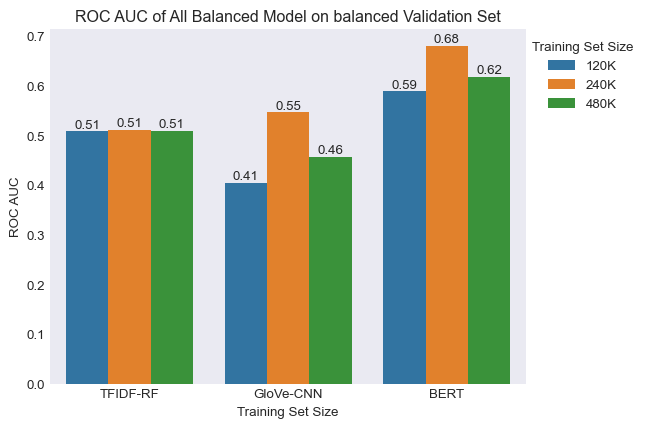

In [17]:
# plot roc_auc on all models with balanced training-set on balanced validation set

plt.figure(dpi=96)

ax = sns.barplot(data=df_bal_all_validbal, x='model', y='roc_auc', hue='training_set')

ax.set_title('ROC AUC of All Balanced Model on balanced Validation Set')
ax.set_xlabel('Training Set Size')
ax.set_ylabel('ROC AUC')
ax.set_xticklabels(['TFIDF-RF', 'GloVe-CNN', 'BERT'])
h, l = ax.get_legend_handles_labels()
ax.legend(h, ['120K', '240K', '480K'], title='Training Set Size', loc='upper right', bbox_to_anchor=(1.25, 1))

ax.bar_label(ax.containers[0], fmt='%.2f')
ax.bar_label(ax.containers[1], fmt='%.2f')
ax.bar_label(ax.containers[2], fmt='%.2f')


if SAVE_GRAPHS:

    plt.savefig(
        Path.joinpath(rq3_output_folder, 'bal_validbal_roc_auc.png'),
        dpi=600, facecolor='w', bbox_inches='tight')
    
plt.show()